<center>
<a href="http://www.insa-toulouse.fr/"><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a>
</center>

# Projet Machine Learning

In [10]:
library(corrplot)
library(ggplot2)
library(gridExtra)
library(GGally)
library(plotly)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-4

Type 'citation("pROC")' for a citation.


Attachement du package : ‘pROC’


Les objets suivants sont masqués depuis ‘package:stats’:

    cov, smooth, var




In [2]:
biodeg <- read.csv("biodeg.csv", header=TRUE, sep="")

In [24]:
#On indique à R les variables quantitatives: B01.C.Br. ; B03.C.Cl.; F03.C.O.

#biodeg$B01.C.Br. <- as.factor(biodeg$B01.C.Br.)
#biodeg$B03.C.Cl. <- as.factor(biodeg$B03.C.Cl.)
biodeg$B03.C.Cl.=factor(biodeg$B03.C.Cl.,labels=c("Absent","Présent"))
biodeg$B01.C.Br.=factor(biodeg$B01.C.Br.,labels=c("Absent","Présent"))
biodeg$F03.C.O.<- as.factor(biodeg$F03.C.O.)


In [25]:
head(biodeg)

,SpMax_L,J_Dz.e.,C.,SdssC,HyWi_B.m.,LOC,SM6_L,F03.C.O.,Me,Mi,⋯,B01.C.Br.,B03.C.Cl.,SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B.m.,Psi_i_A,SM6_B.m.,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,⋯,Absent,Absent,1.932,0.011,0.000,4.489,2.949,1.591,7.253,1
2,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,⋯,Absent,Absent,2.214,-0.204,0.000,1.542,3.315,1.967,7.257,1
3,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,⋯,Absent,Absent,1.942,-0.008,0.000,4.891,3.076,2.417,7.601,1
4,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,⋯,Absent,Absent,1.414,1.073,8.361,1.333,3.046,5.000,6.690,1
5,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,2,1.004,1.147,⋯,Absent,Absent,1.985,-0.002,10.348,5.588,3.351,2.405,8.003,1
6,4.236,3.4286,28.6,-0.275,3.313,2.522,9.383,1,1.014,1.149,⋯,Absent,Absent,1.980,-0.008,10.276,4.746,3.351,2.556,7.904,1


In [26]:
summary(biodeg)

    SpMax_L         J_Dz.e.             C.            SdssC        
 Min.   :2.000   Min.   :0.8039   Min.   : 0.00   Min.   :-5.2560  
 1st Qu.:4.481   1st Qu.:2.5027   1st Qu.:30.45   1st Qu.:-0.1910  
 Median :4.828   Median :3.0463   Median :37.50   Median : 0.0000  
 Mean   :4.783   Mean   :3.0695   Mean   :37.06   Mean   :-0.1971  
 3rd Qu.:5.125   3rd Qu.:3.4377   3rd Qu.:43.40   3rd Qu.: 0.0000  
 Max.   :6.496   Max.   :9.1775   Max.   :60.70   Max.   : 4.7220  
                                                                   
   HyWi_B.m.          LOC            SM6_L           F03.C.O.         Me       
 Min.   :1.544   Min.   :0.000   Min.   : 4.174   0      :376   Min.   :0.957  
 1st Qu.:3.105   1st Qu.:0.875   1st Qu.: 9.533   2      :129   1st Qu.:0.983  
 Median :3.442   Median :1.187   Median :10.039   4      :118   Median :1.003  
 Mean   :3.477   Mean   :1.351   Mean   : 9.937   6      : 81   Mean   :1.013  
 3rd Qu.:3.825   3rd Qu.:1.705   3rd Qu.:10.514   8     

##  Etude des variables explicatives

###  Etude unidimensionnelle des variables quantitatives

Le jeu de donnée est composée de 17 variables explicatives et quantitatives.

In [47]:
#Création jeu de données sans les variables quali
biodeg2 <- biodeg[, -c(8,12,13,21)]

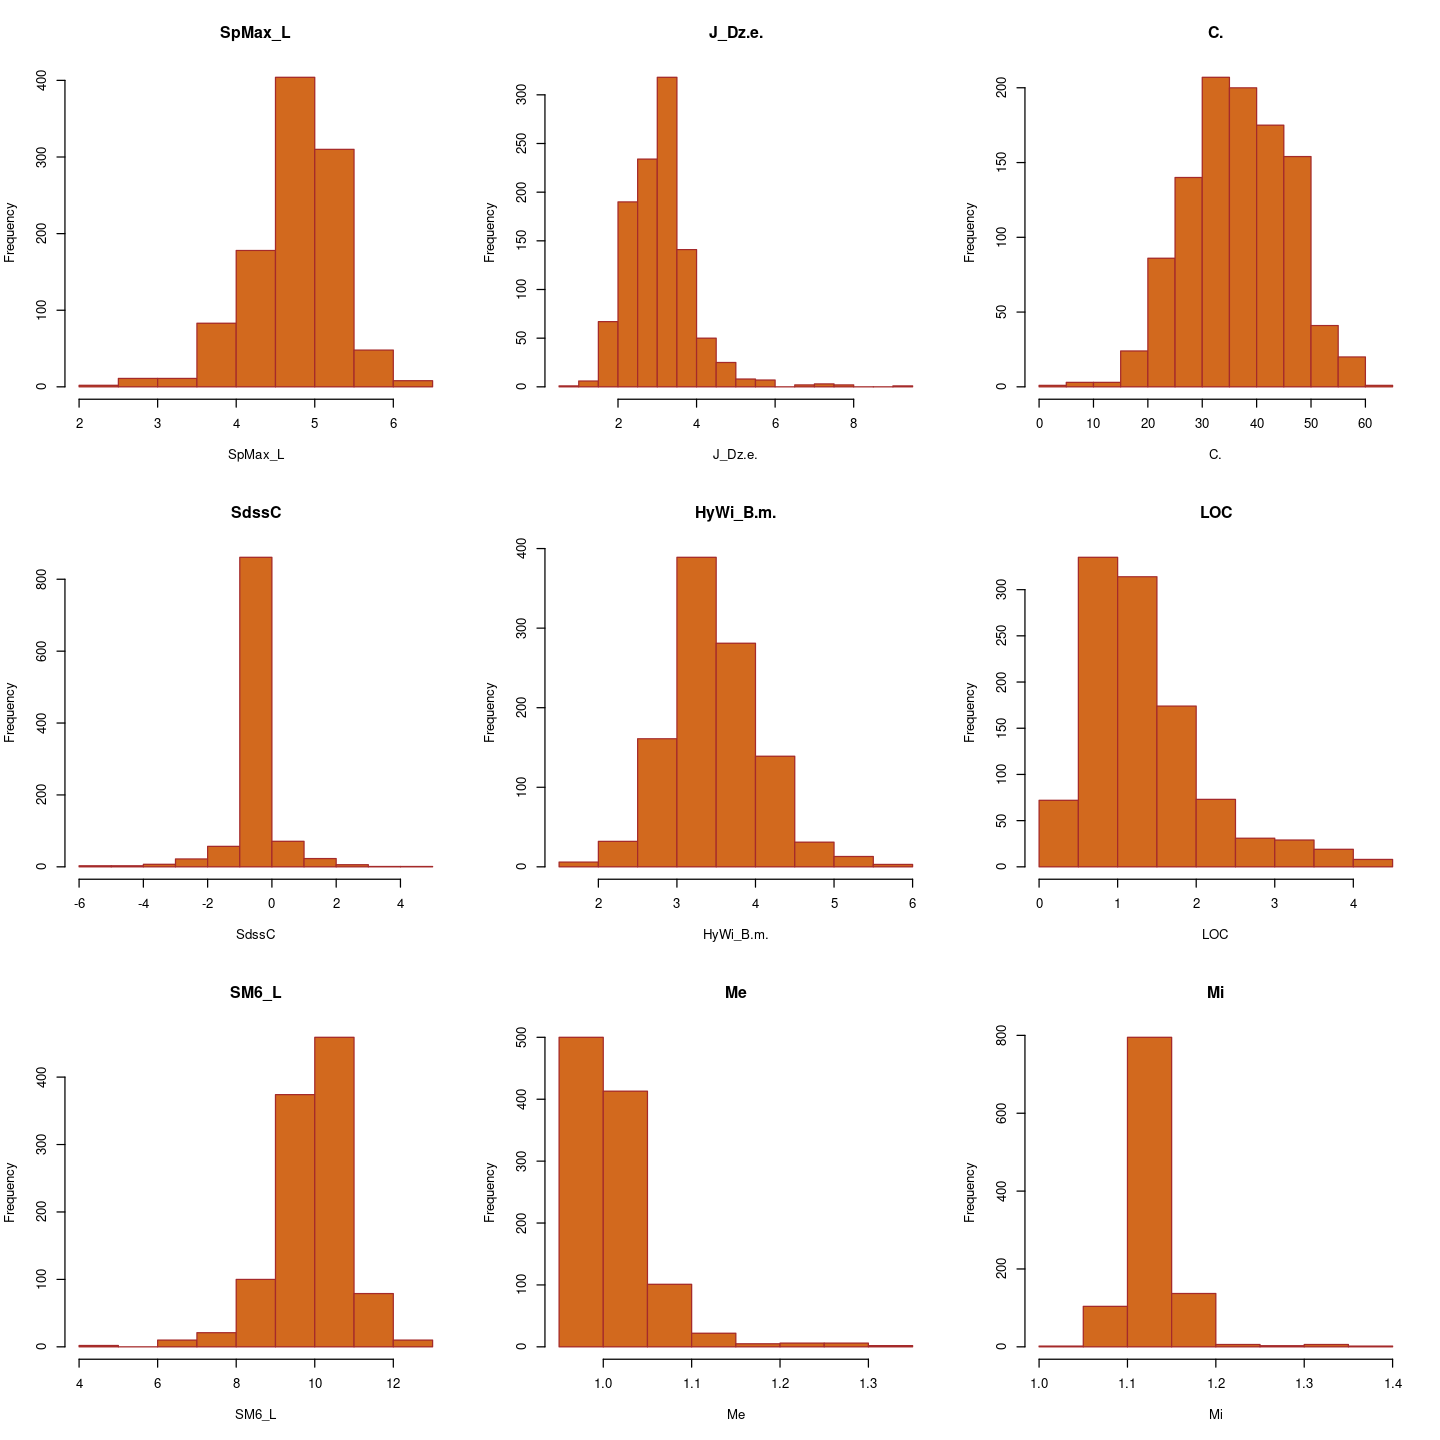

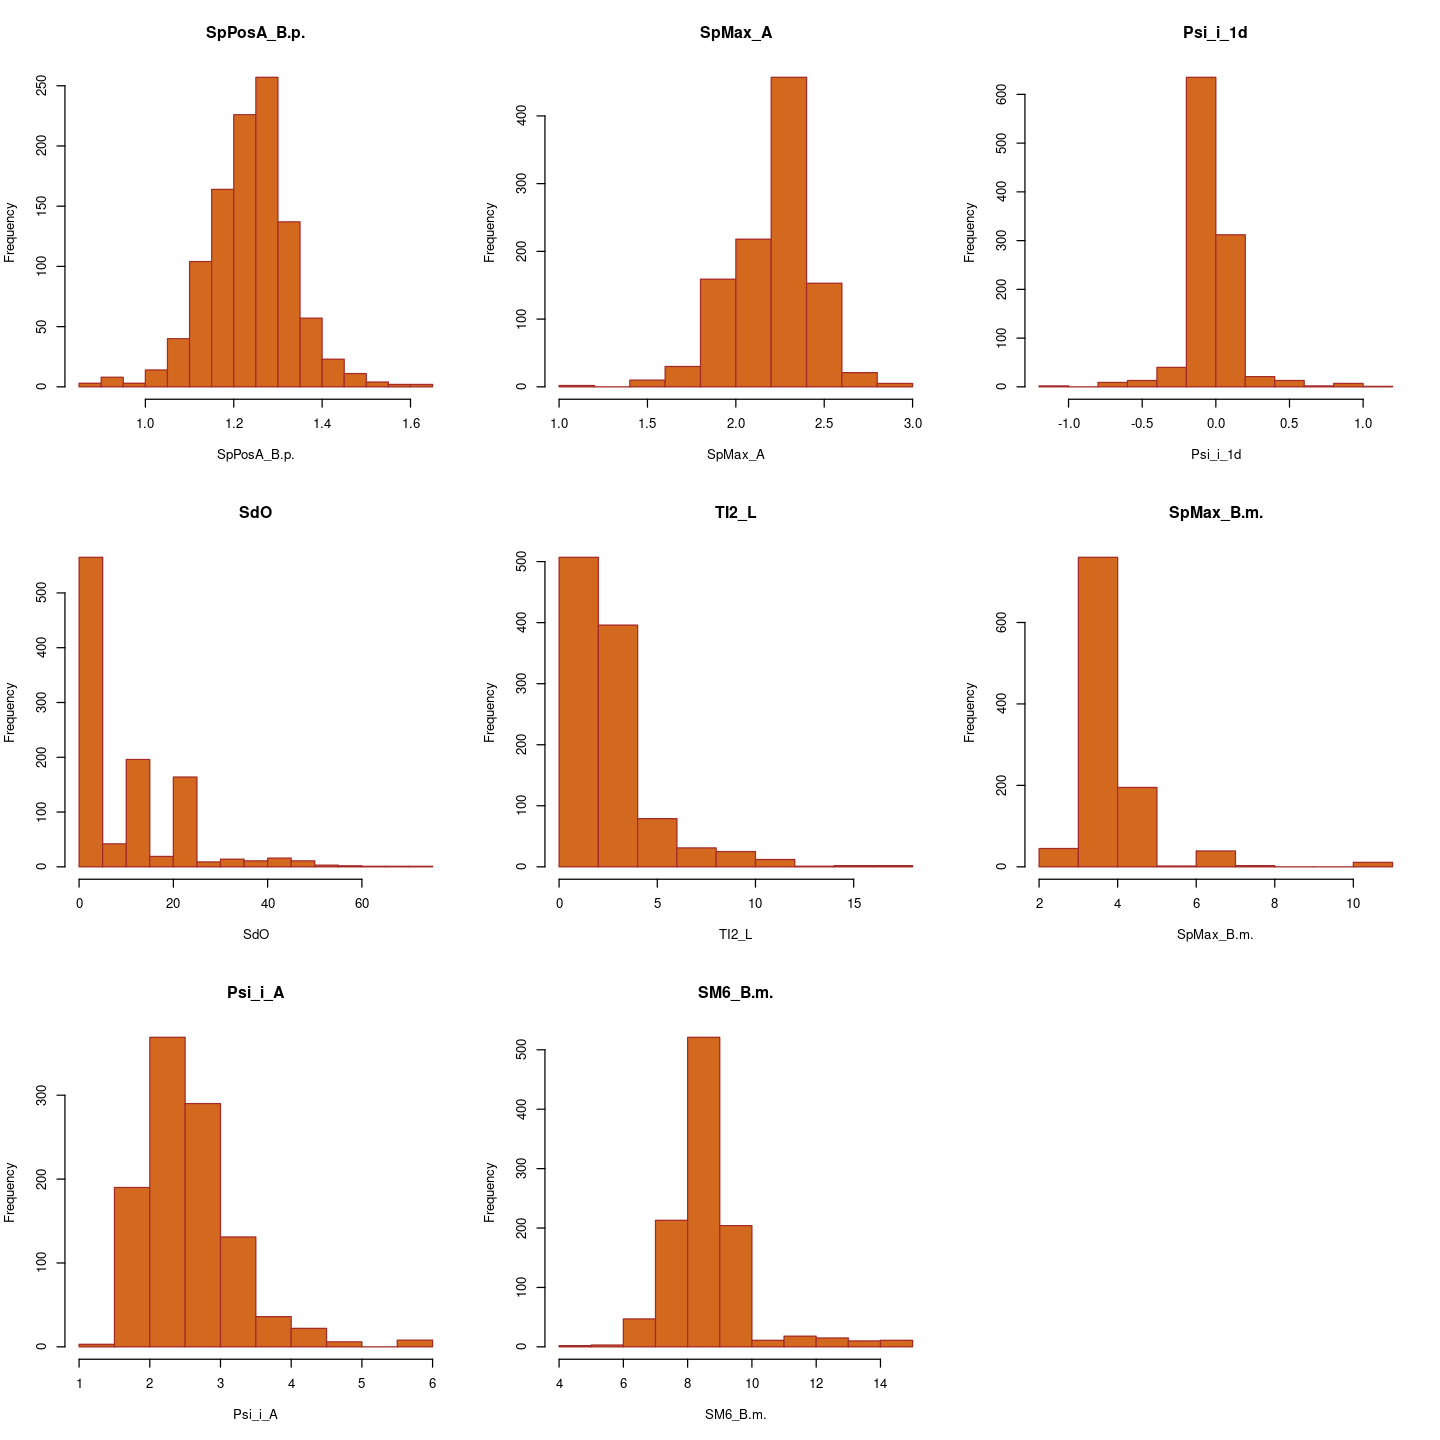

In [58]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(3,3))
for (i in 1:17){
    hist(biodeg2[,names(biodeg2)[i]],xlab=names(biodeg2)[i], main=names(biodeg2)[i], col="chocolate",border="brown")
    }


On observe que : 


In [ ]:
# Demander à Aijana Transphormation Faite des variables 

###  Analyse bidimensionnelle entre variables quantitatives

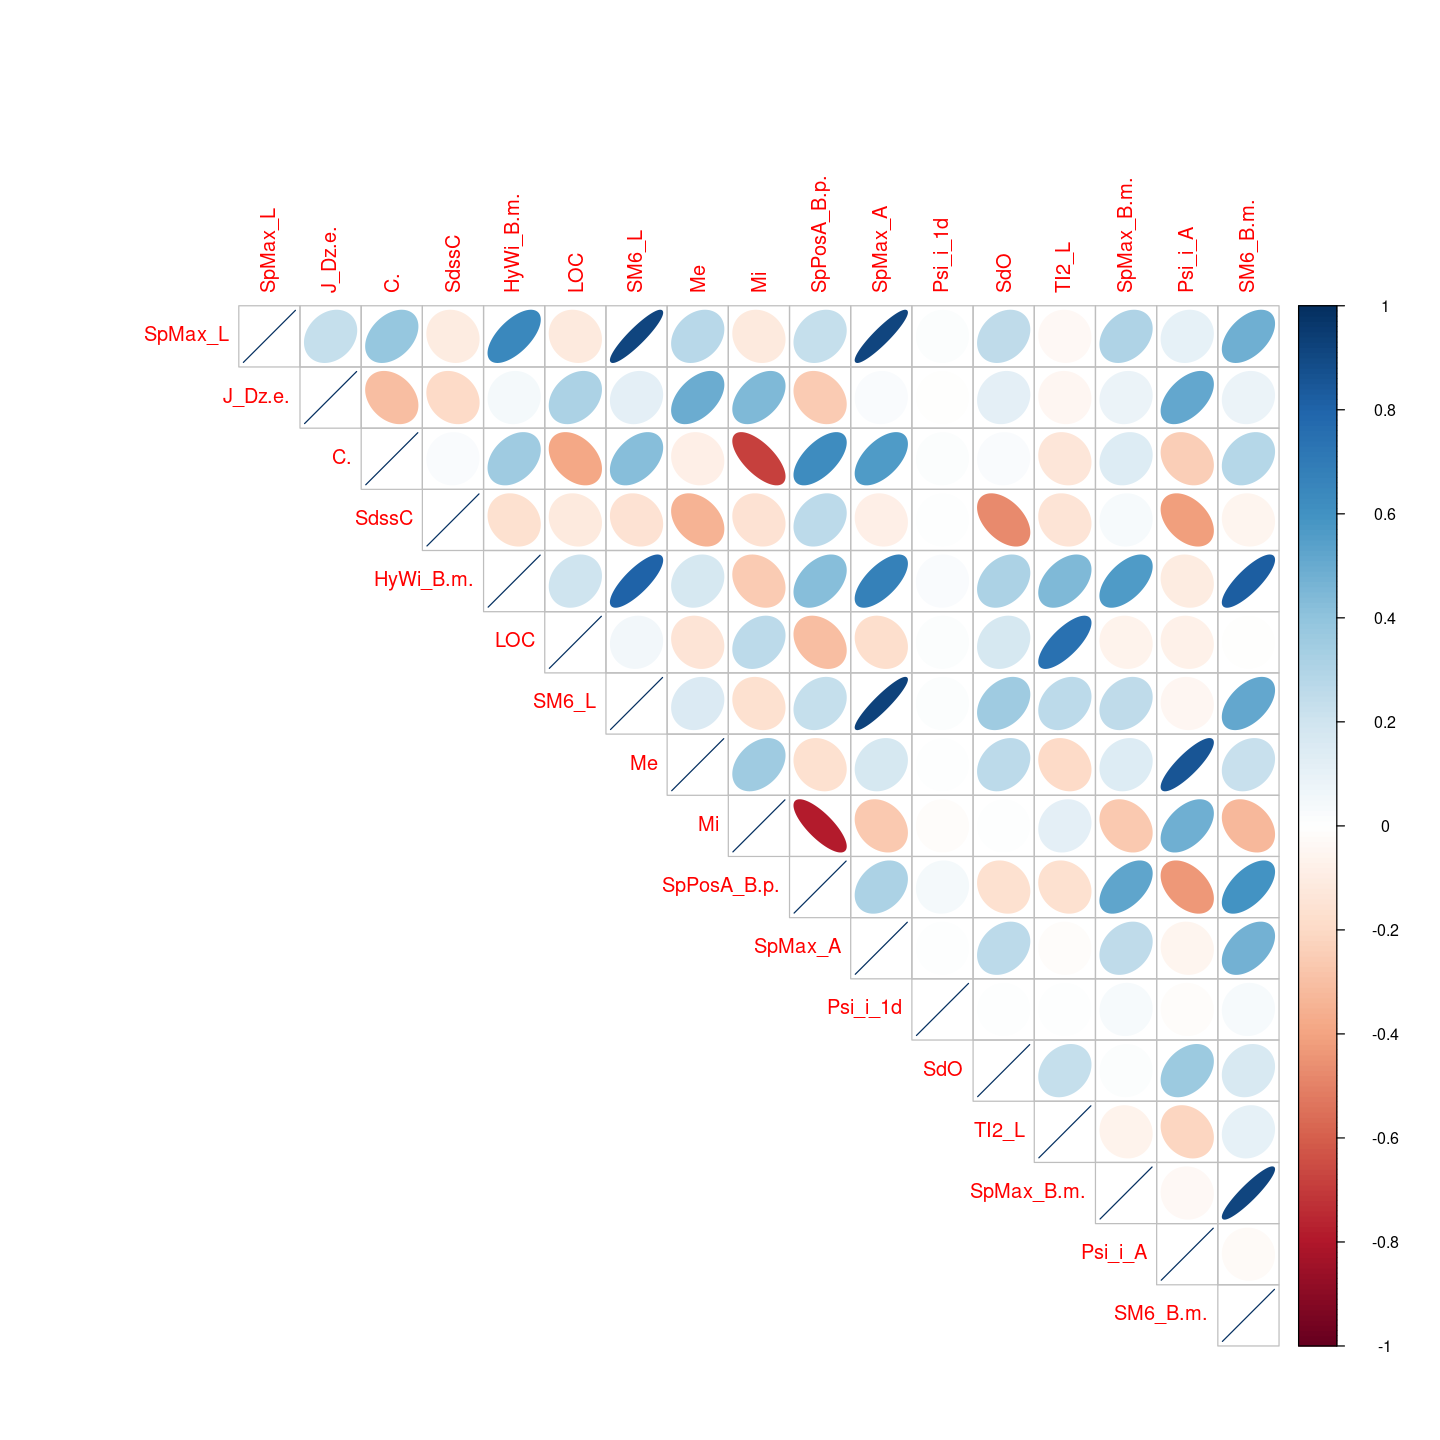

In [59]:
corrplot(cor(biodeg2),method="ellipse", type="upper")

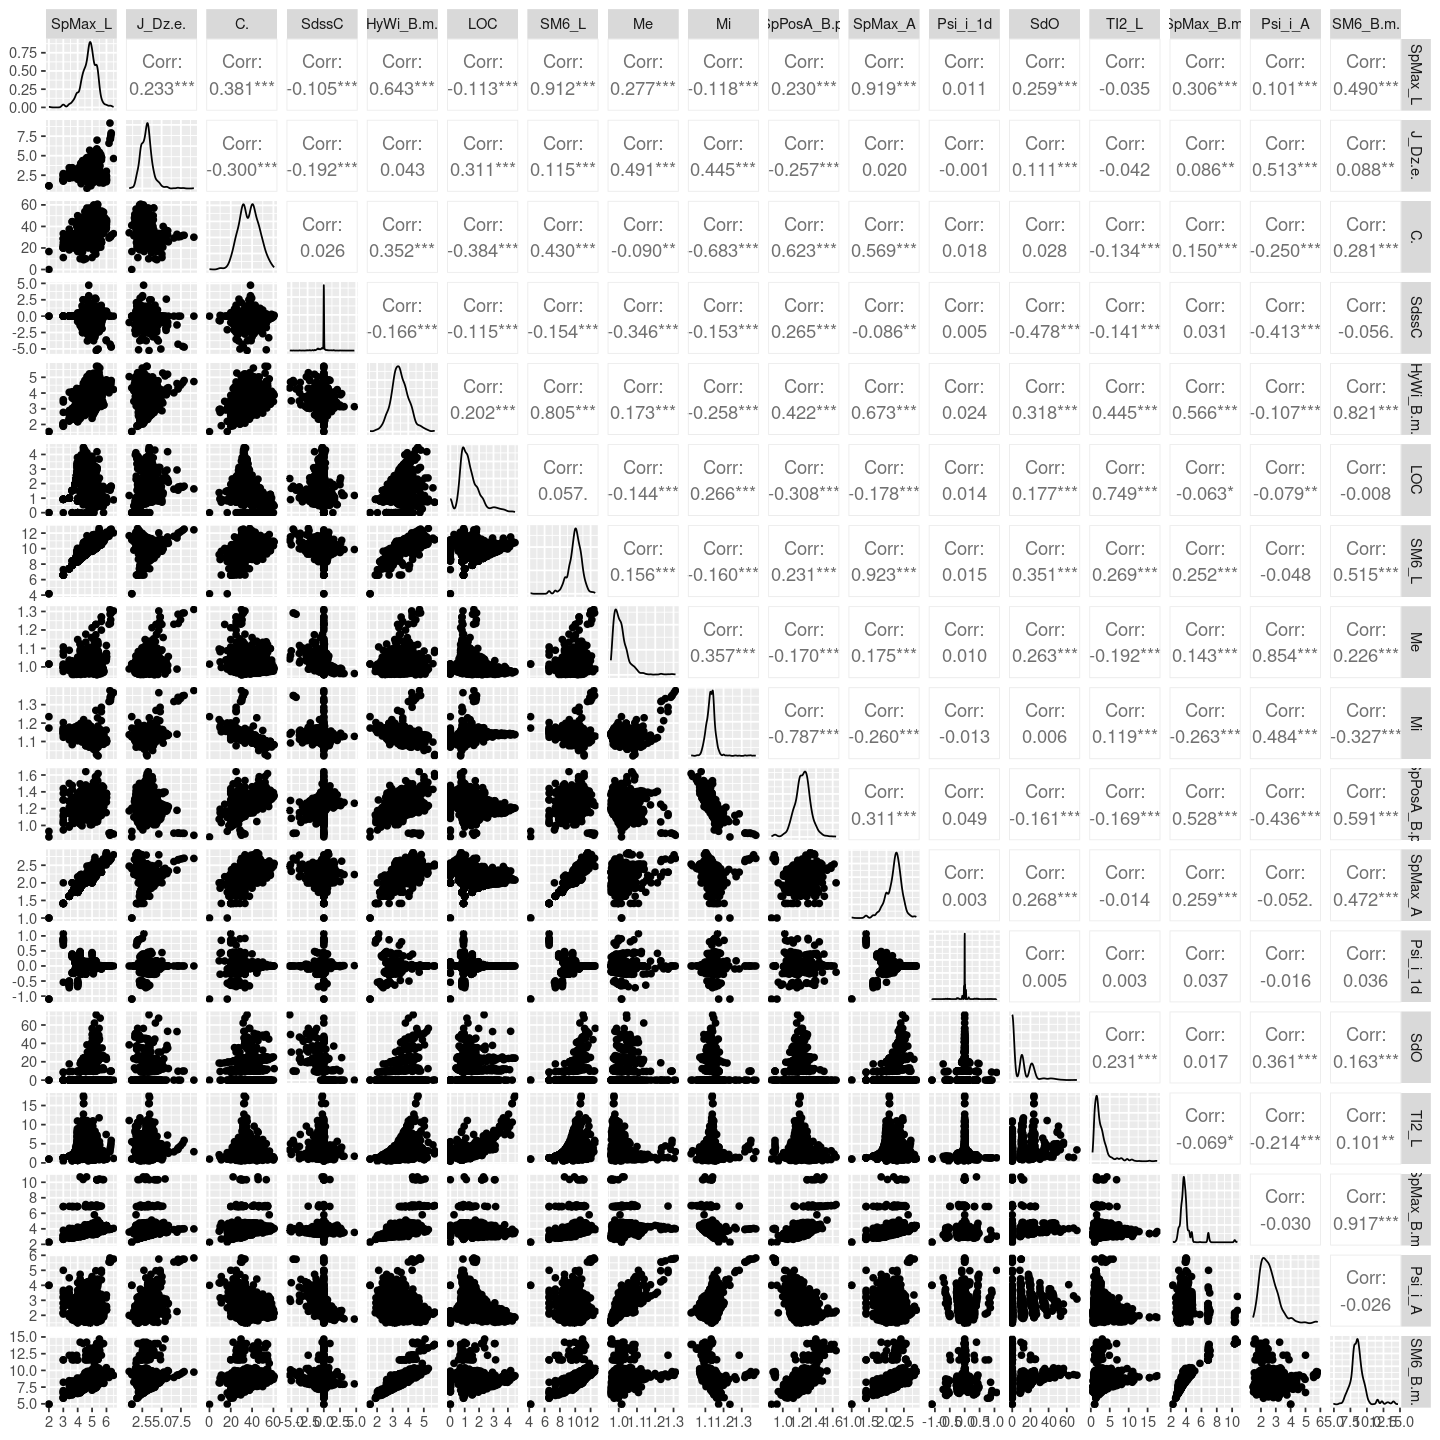

In [60]:
ggpairs(biodeg2)

<p><red> 
    
    On remarque que : 

    - La variable SpMax_L, SM6_L et SpMax_A sont très fortement corrélées et de façon positive, en effet on observe que si on prend les coefficients de corrélations des variables pris deux à deux sont supérieures à 0,910 . Ces derniéres apportent des informations sur la topologie du molécules et les relations adjacentes des atomes au sein d’une molécule.
    - Les variables C et Mi sont corrélés négativement, avec un coefficient de corrélation égale à -0,683. Ceci s’explique par le fait que la forte présence de carbone au sein d’une molécule abaisse le pouvoir ionisant de cette dernière.
    - Le coefficient de corrélation entre les variables Mi et SpPosA_B.p est égale à -0,787 ainsi les variables Mi et SpPosA_B.p sont corrélé négativement.  
    - Les variables SpMax_Bm et SM6_Bm sont aussi très fortement corrélées, en effet il donne tout deux des informations sur la matrice de Burden.
    - Les variables Me et Psi_i_A sont fortement corrélé 
    - Les variables HyWi_B.m et SM6_B.m
    
</red>

###  Etude unidimensionnelle des variables qualitatives

Le jeu de donnée est composée de 3 variables qualitatives explicative et d'une variable qualitative à expliqué. 

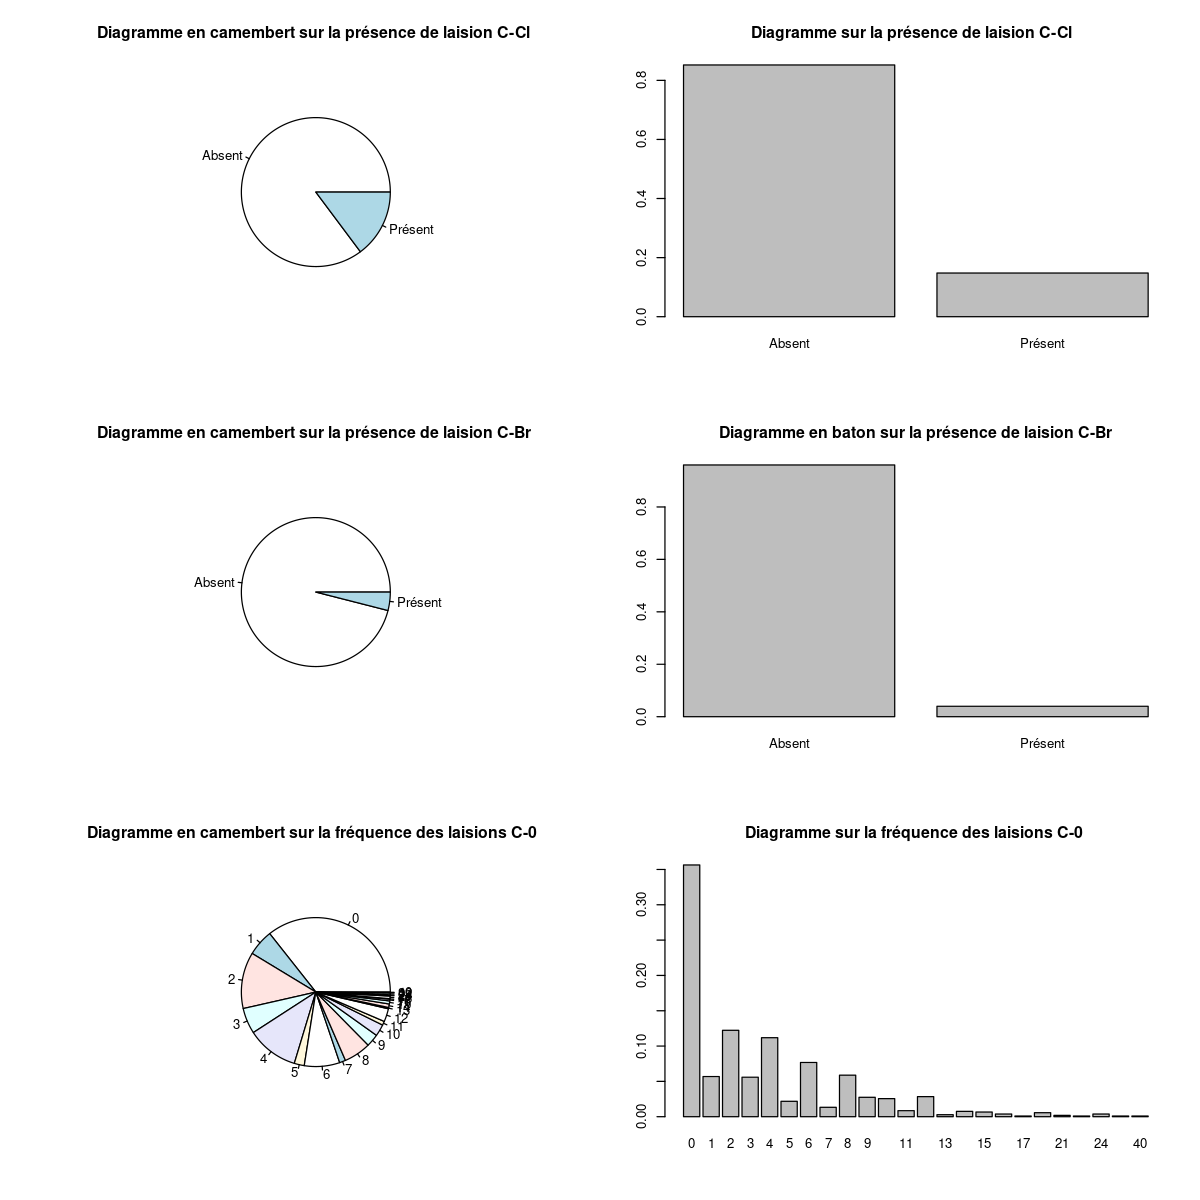

In [27]:
options(repr.plot.width = 10, repr.plot.height = 10)

par(mfrow = c(3,2))
pie(table(biodeg$B03.C.Cl.), main="Diagramme en camembert sur la présence de laision C-Cl ")
barplot(table(biodeg$B03.C.Cl.)/sum(table(biodeg$B03.C.Cl.)), main="Diagramme sur la présence de laision C-Cl  ")
pie(table(biodeg$B01.C.Br.), main="Diagramme en camembert sur la présence de laision C-Br ")
barplot(table(biodeg$B01.C.Br.)/sum(table(biodeg$B01.C.Br.)), main="Diagramme en baton sur la présence de laision C-Br")
pie(table(biodeg$F03.C.O.), main="Diagramme en camembert sur la fréquence des laisions C-0  ")
barplot(table(biodeg$F03.C.O.)/sum(table(biodeg$F03.C.O.)), main="Diagramme sur la fréquence des laisions C-0 ")

On observe que plus de 90% des molécules ne possèdent pas de liaisons C-Br de même 82% des molécules ne possédent pas de liaisons C-Cl, ce qui peut nous apporter des informations sur la topologie de la molécule étudiée ainsi que leurs propriétés. 
Concernant, la fréquence de liaison C-O dans les molécules.  On peut rassembler les classes en classe plus pertinentes par exemple : fortement présente : si la fréquence d'apparation de ces liaisons est compris entre 10-40, moyennement présente si la fréquence d'apparations est entre 3 et 9, faiblement présente si la fréquence d'apparation est entre 0 et 2. 

In [ ]:
# Modification de la variable (Voir avec Aijana)

###  Analyse bidimensionnelle des variables qualitatives

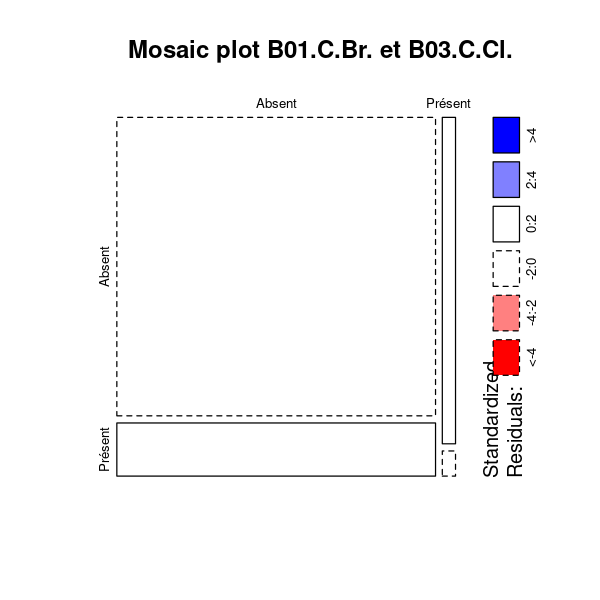

In [32]:
#Analyse bidimensitionelle des variables presence de liaison C-Cl et C-Br
options(repr.plot.width = 5, repr.plot.height = 5)
tablecont<- table(biodeg$B01.C.Br.,biodeg$B03.C.Cl.)
mosaicplot(tablecont,main="Mosaic plot B01.C.Br. et B03.C.Cl. ", shade=TRUE)


In [ ]:
#Analyse bidimensitionelle des variables presence de liaison C-O et C-Br

In [ ]:
#Analyse bidimensitionelle des variables presence de liaison C-Cl et C-O

In [30]:
# Test d'indépendance du Khi-2

khi_test = chisq.test(tablecont)
khi_test


	Pearson's Chi-squared test with Yates' continuity correction

data:  tablecont
X-squared = 1.4457, df = 1, p-value = 0.2292


Par le mosaic plot, on observe qu’il n’y a aucune corrélation entre la variable indiquant la présence de liaison C-Cl et celle indiquant la présence de liaison C-Br. Le test d’indépendance du Khi-2, nous donne le même résultat, puisque la p-valeur est supérieur à $\alpha$=5%, ainsi on accepte l'hypothése nulle : les variables C-Cl et C-Br sont indépendant. 

### Analyse bidimensionnelle entre variable quantitative et qualitative

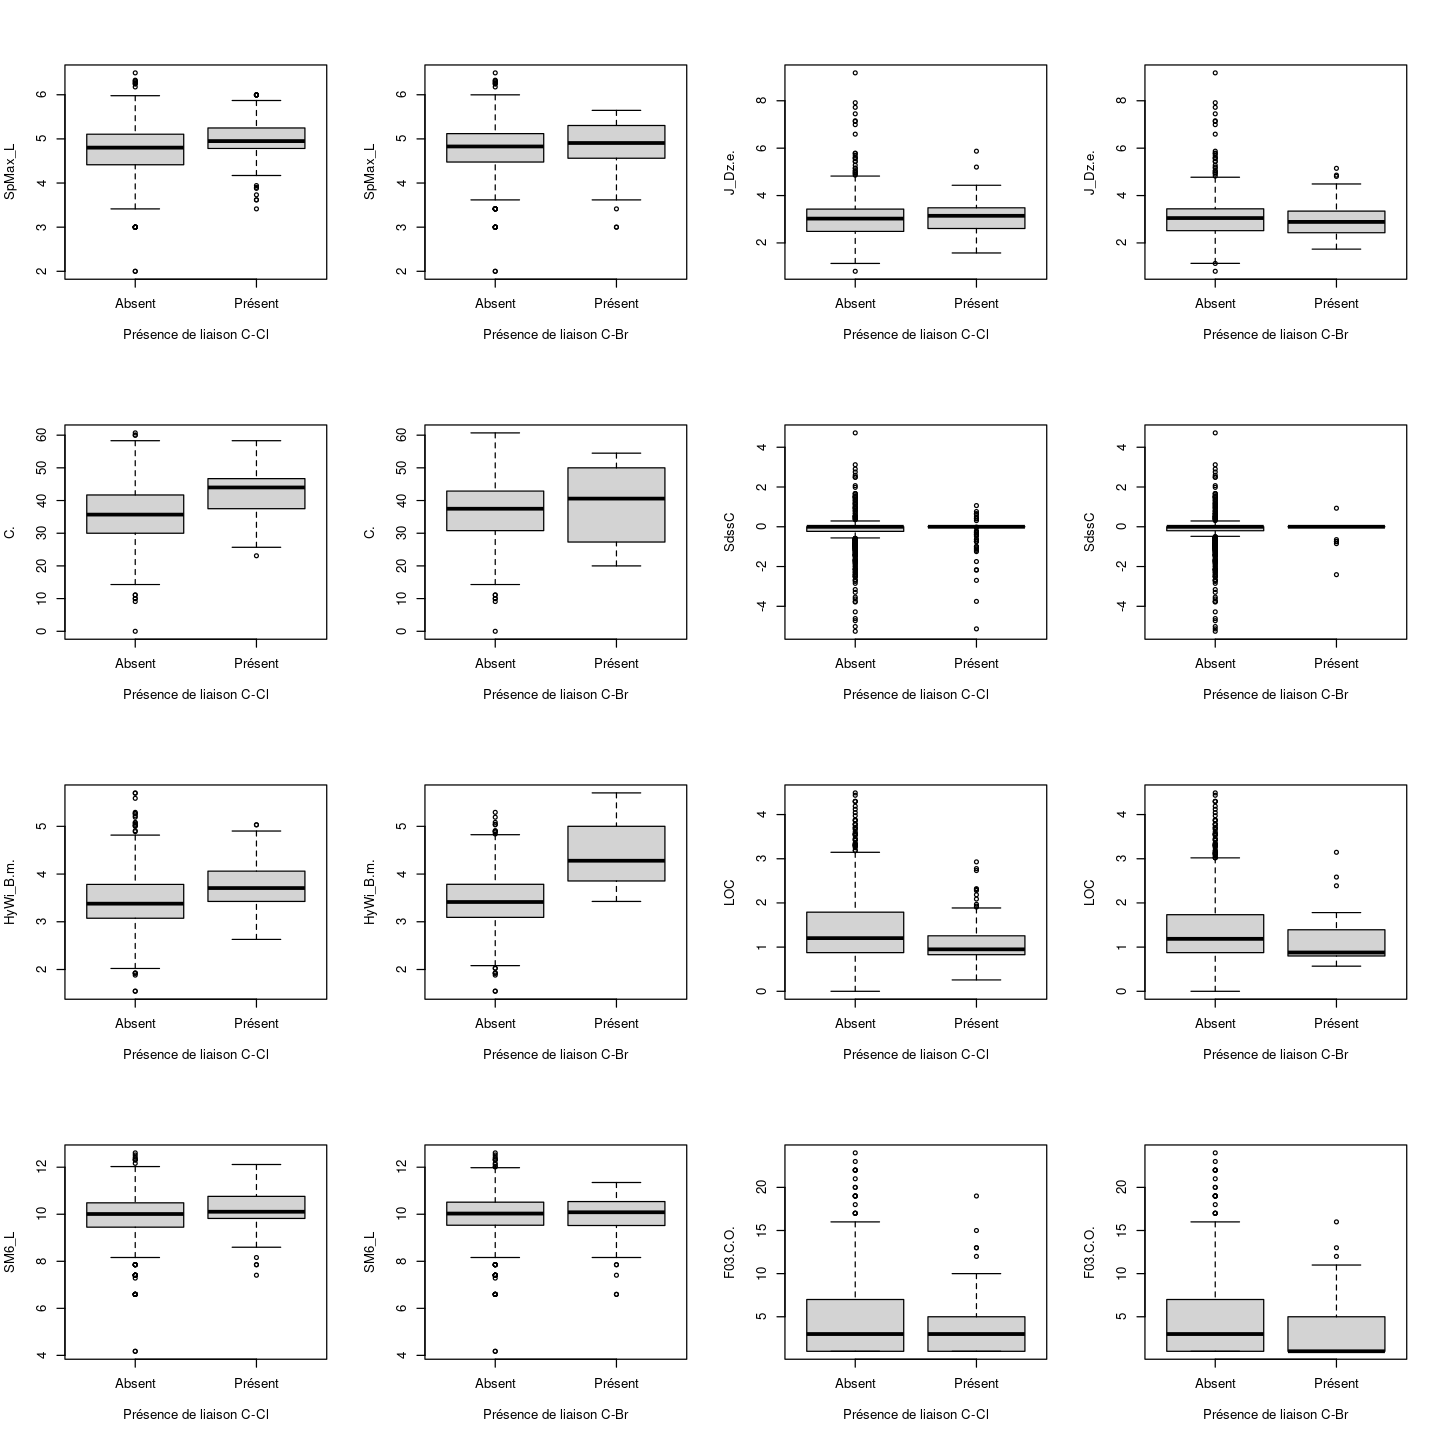

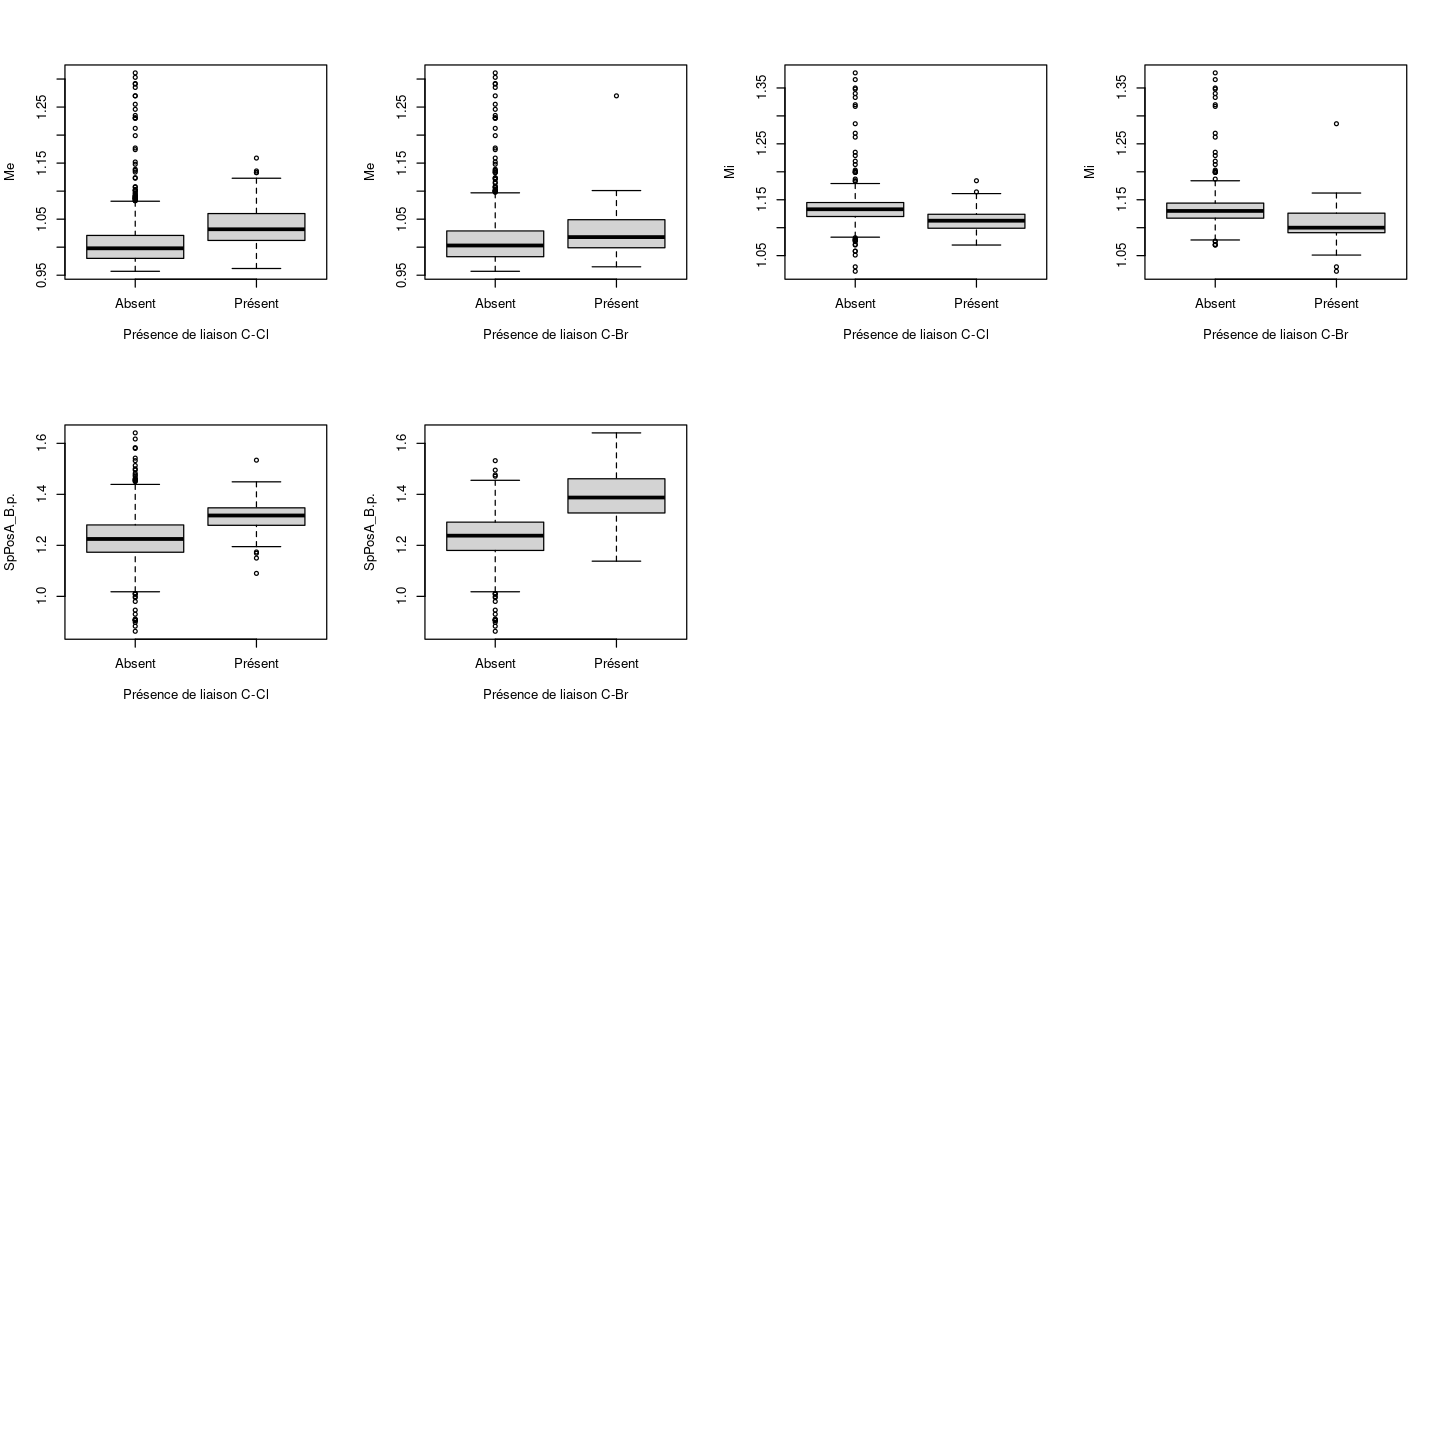

In [34]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(4,4))
for (i in 1:11){
    boxplot( biodeg[,names(biodeg)[i]]~ biodeg$B03.C.Cl. , ylab = names(biodeg)[i], xlab="Présence de liaison C-Cl" ,cex.main = 1)
    boxplot( biodeg[,names(biodeg)[i]]~ biodeg$B01.C.Br., ylab = names(biodeg)[i], xlab="Présence de liaison C-Br" ,cex.main = 1)
    }

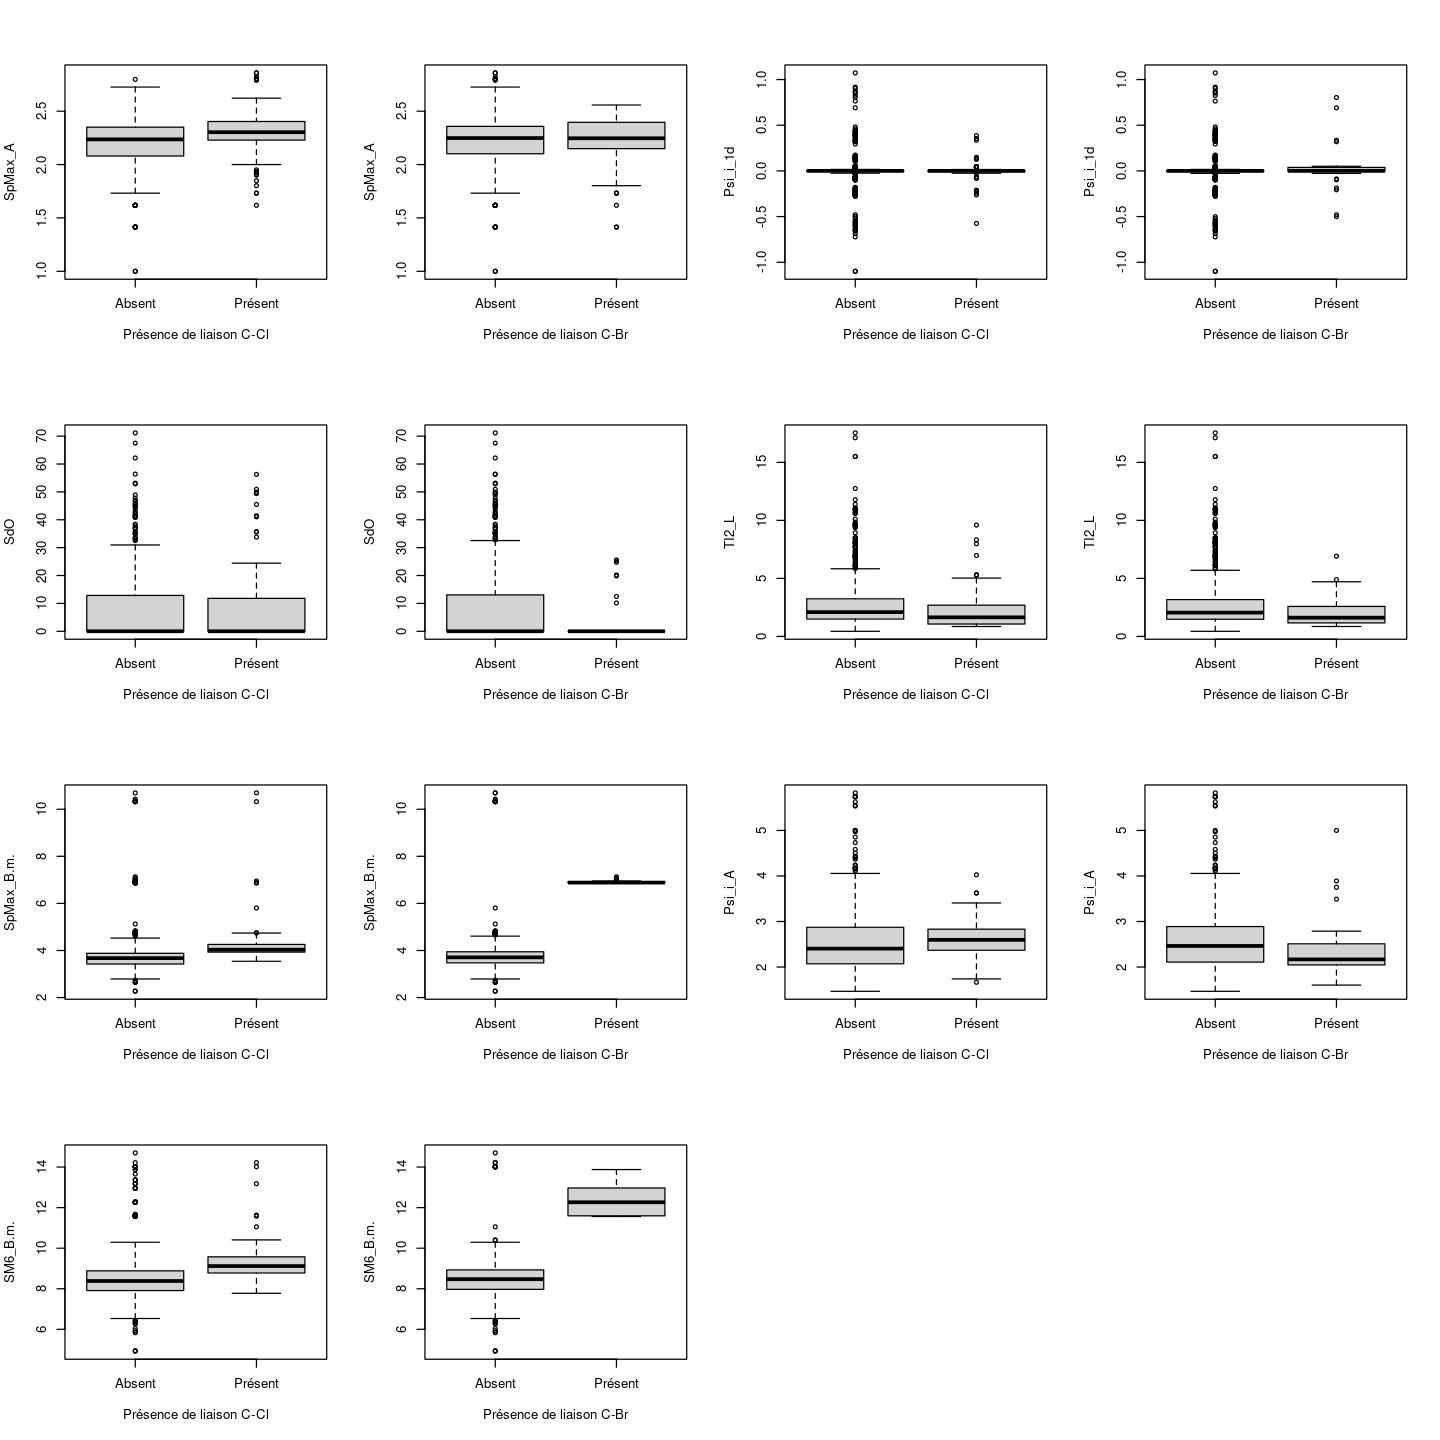

In [35]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(4,4))
for (i in 14:20){
    boxplot( biodeg[,names(biodeg)[i]]~ biodeg$B03.C.Cl. , ylab = names(biodeg)[i], xlab="Présence de liaison C-Cl" ,cex.main = 1)
    boxplot( biodeg[,names(biodeg)[i]]~ biodeg$B01.C.Br., ylab = names(biodeg)[i], xlab="Présence de liaison C-Br" ,cex.main = 1)
    }

Aprés analyse et sélection, on observe 

## Réalisation de l'ACP

In [9]:
summary(biodeg)

    SpMax_L         J_Dz.e.             C.            SdssC        
 Min.   :2.000   Min.   :0.8039   Min.   : 0.00   Min.   :-5.2560  
 1st Qu.:4.481   1st Qu.:2.5027   1st Qu.:30.45   1st Qu.:-0.1910  
 Median :4.828   Median :3.0463   Median :37.50   Median : 0.0000  
 Mean   :4.783   Mean   :3.0695   Mean   :37.06   Mean   :-0.1971  
 3rd Qu.:5.125   3rd Qu.:3.4377   3rd Qu.:43.40   3rd Qu.: 0.0000  
 Max.   :6.496   Max.   :9.1775   Max.   :60.70   Max.   : 4.7220  
                                                                   
   HyWi_B.m.          LOC            SM6_L           F03.C.O.         Me       
 Min.   :1.544   Min.   :0.000   Min.   : 4.174   0      :376   Min.   :0.957  
 1st Qu.:3.105   1st Qu.:0.875   1st Qu.: 9.533   2      :129   1st Qu.:0.983  
 Median :3.442   Median :1.187   Median :10.039   4      :118   Median :1.003  
 Mean   :3.477   Mean   :1.351   Mean   : 9.937   6      : 81   Mean   :1.013  
 3rd Qu.:3.825   3rd Qu.:1.705   3rd Qu.:10.514   8     

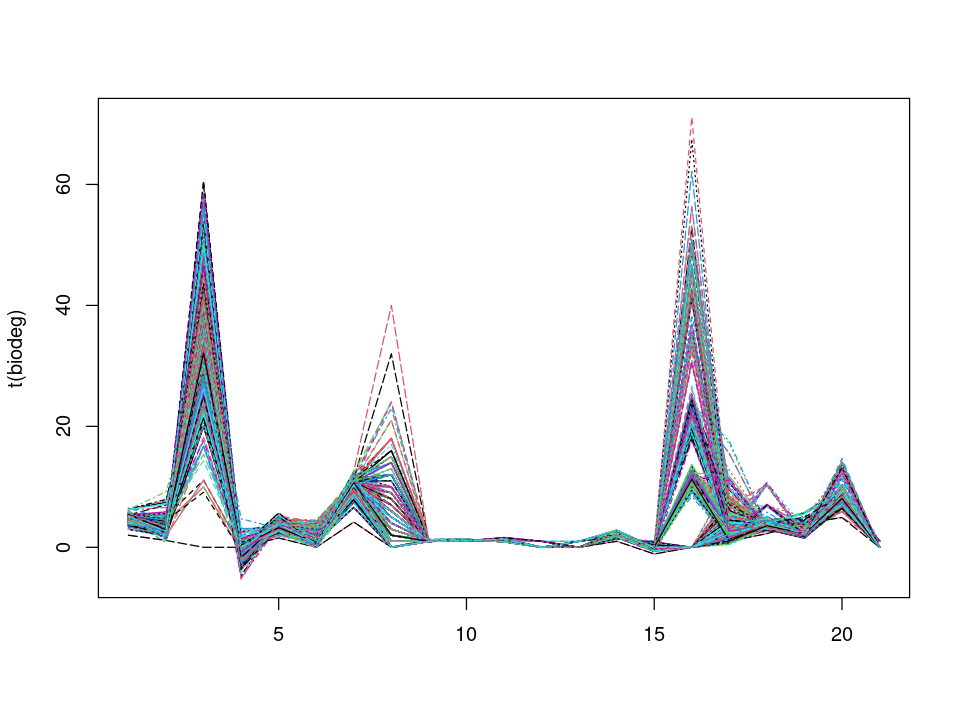

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)
matplot(t(biodeg), type = "l")

In [11]:
#Création jeu de données sans les variables quali
biodeg2 <- biodeg[, -c(8,12,13,21)]

In [12]:
summary(biodeg2)

    SpMax_L         J_Dz.e.             C.            SdssC        
 Min.   :2.000   Min.   :0.8039   Min.   : 0.00   Min.   :-5.2560  
 1st Qu.:4.481   1st Qu.:2.5027   1st Qu.:30.45   1st Qu.:-0.1910  
 Median :4.828   Median :3.0463   Median :37.50   Median : 0.0000  
 Mean   :4.783   Mean   :3.0695   Mean   :37.06   Mean   :-0.1971  
 3rd Qu.:5.125   3rd Qu.:3.4377   3rd Qu.:43.40   3rd Qu.: 0.0000  
 Max.   :6.496   Max.   :9.1775   Max.   :60.70   Max.   : 4.7220  
   HyWi_B.m.          LOC            SM6_L              Me       
 Min.   :1.544   Min.   :0.000   Min.   : 4.174   Min.   :0.957  
 1st Qu.:3.105   1st Qu.:0.875   1st Qu.: 9.533   1st Qu.:0.983  
 Median :3.442   Median :1.187   Median :10.039   Median :1.003  
 Mean   :3.477   Mean   :1.351   Mean   : 9.937   Mean   :1.013  
 3rd Qu.:3.825   3rd Qu.:1.705   3rd Qu.:10.514   3rd Qu.:1.029  
 Max.   :5.701   Max.   :4.491   Max.   :12.609   Max.   :1.311  
       Mi         SpPosA_B.p.       SpMax_A         Psi_i_1d  

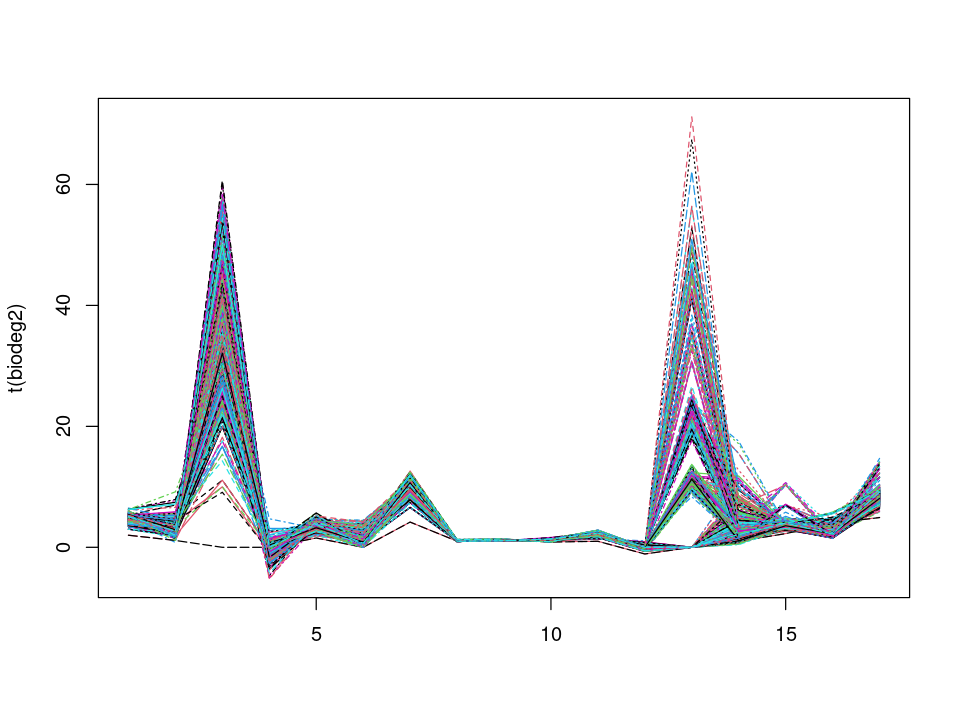

In [13]:
options(repr.plot.width = 8, repr.plot.height = 6)
matplot(t(biodeg2), type = "l")

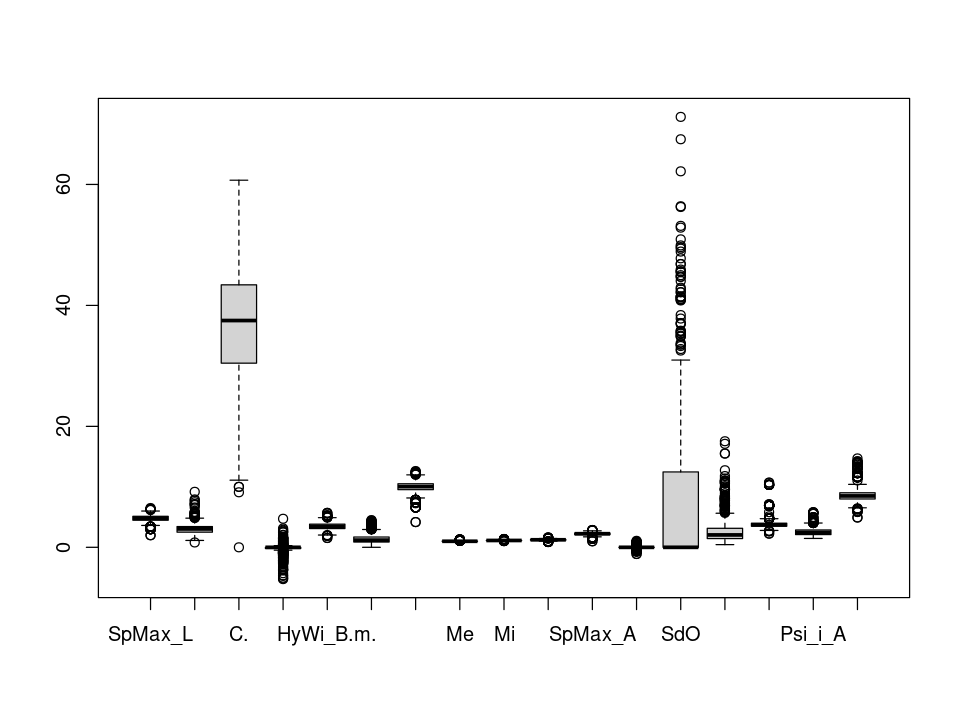

In [14]:
# Plot
boxplot(biodeg2)

ERROR: Error in sort(y): l'argument "y" est manquant, avec aucune valeur par défaut


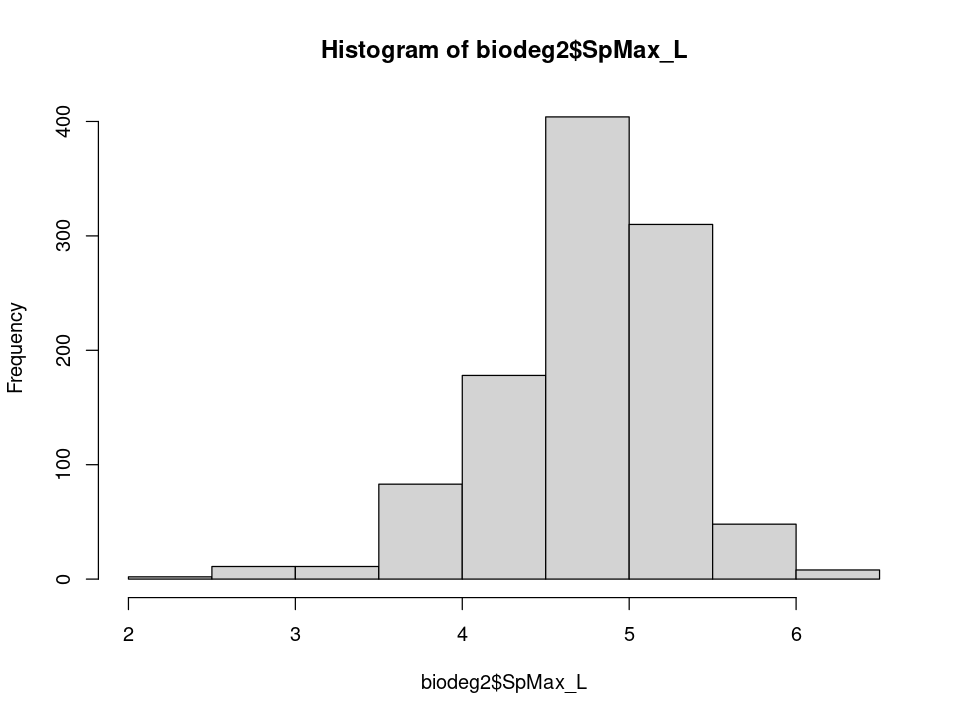

In [15]:
hist(biodeg2$SpMax_L)
qqplot(biodeg2$SpMax_L)

In [41]:
cor(biodeg2)

,SpMax_L,J_Dz.e.,C.,SdssC,HyWi_B.m.,LOC,SM6_L,Me,Mi,SpPosA_B.p.,SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B.m.,Psi_i_A,SM6_B.m.
SpMax_L,1.00000000,0.232683126,0.38146395,-0.105155247,0.64285798,-0.113168611,0.91154650,0.276838315,-0.11833237,0.23043835,0.918928008,0.011153682,0.259498383,-0.035090516,0.30563755,0.10142276,0.489765292
J_Dz.e.,0.23268313,1.000000000,-0.30008167,-0.192385052,0.04337838,0.310927642,0.11532517,0.491129146,0.44470385,-0.25730062,0.020384024,-0.001269002,0.110712379,-0.042343598,0.08586695,0.51340379,0.087903486
C.,0.38146395,-0.300081674,1.00000000,0.025883674,0.35241600,-0.384364072,0.42978985,-0.089817084,-0.68258202,0.62310823,0.568841521,0.017590460,0.027981620,-0.134109155,0.14971344,-0.24986072,0.280505480
SdssC,-0.10515525,-0.192385052,0.02588367,1.000000000,-0.16638293,-0.115385522,-0.15437379,-0.346170363,-0.15279247,0.26515442,-0.085854670,0.005353047,-0.477803379,-0.141323290,0.03116372,-0.41345494,-0.055758304
HyWi_B.m.,0.64285798,0.043378377,0.35241600,-0.166382935,1.00000000,0.201576168,0.80525404,0.173249362,-0.25772482,0.42153741,0.673058932,0.024123019,0.317981528,0.444983664,0.56555051,-0.10699145,0.821144311
LOC,-0.11316861,0.310927642,-0.38436407,-0.115385522,0.20157617,1.000000000,0.05707869,-0.144174483,0.26611278,-0.30800241,-0.178406604,0.014142385,0.177120015,0.749381622,-0.06308215,-0.07942090,-0.007826759
SM6_L,0.91154650,0.115325167,0.42978985,-0.154373794,0.80525404,0.057078689,1.00000000,0.155945550,-0.16038781,0.23116488,0.922649450,0.015375031,0.351159644,0.269422455,0.25246869,-0.04769736,0.514927913
Me,0.27683832,0.491129146,-0.08981708,-0.346170363,0.17324936,-0.144174483,0.15594555,1.000000000,0.35707750,-0.16977014,0.174739749,0.009768462,0.262762333,-0.192215161,0.14314462,0.85375240,0.225859073
Mi,-0.11833237,0.444703848,-0.68258202,-0.152792473,-0.25772482,0.266112784,-0.16038781,0.357077496,1.00000000,-0.78697746,-0.260057184,-0.012626190,0.006401350,0.118960989,-0.26308627,0.48364417,-0.326834233
SpPosA_B.p.,0.23043835,-0.257300620,0.62310823,0.265154419,0.42153741,-0.308002415,0.23116488,-0.169770140,-0.78697746,1.00000000,0.311171838,0.048814933,-0.161398905,-0.168992885,0.52775750,-0.43644101,0.590618984


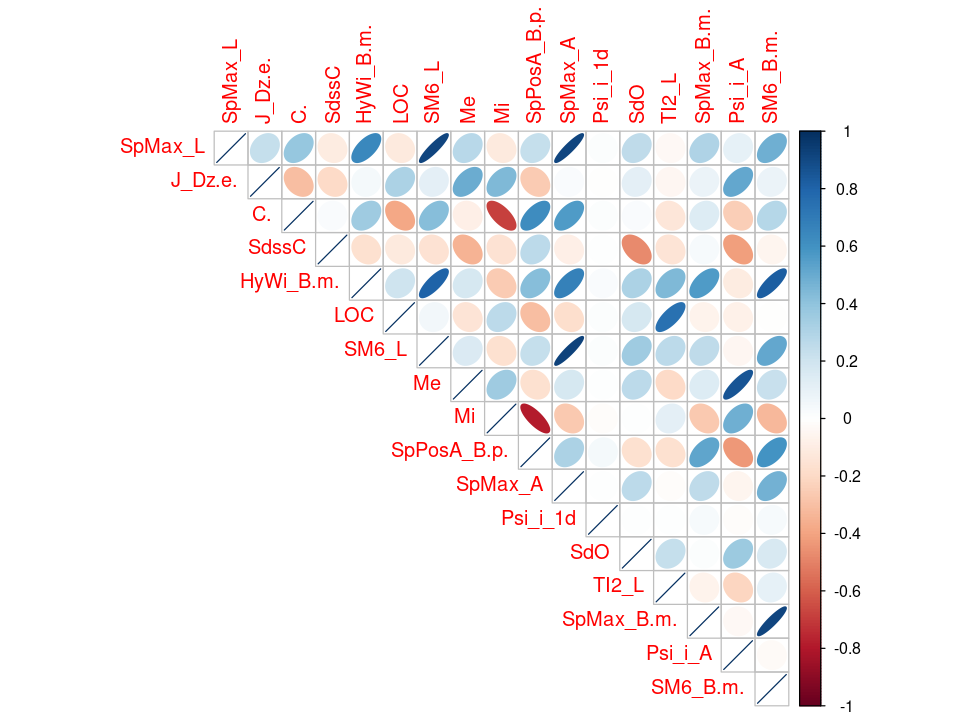

In [42]:
library(corrplot)
M=cor(biodeg2)
corrplot(M,method="ellipse",type="upper")

## Partie ACP

In [16]:
#On enlève les variables qualitatives de notre jeu de données avec l'option quali.sup
library(FactoMineR)
acp <- PCA(biodeg2, scale.unit=TRUE, graph=TRUE,ncp=12)
options(repr.plot.width = 12, repr.plot.height = 5)

### Choix du nombre de composantes principales

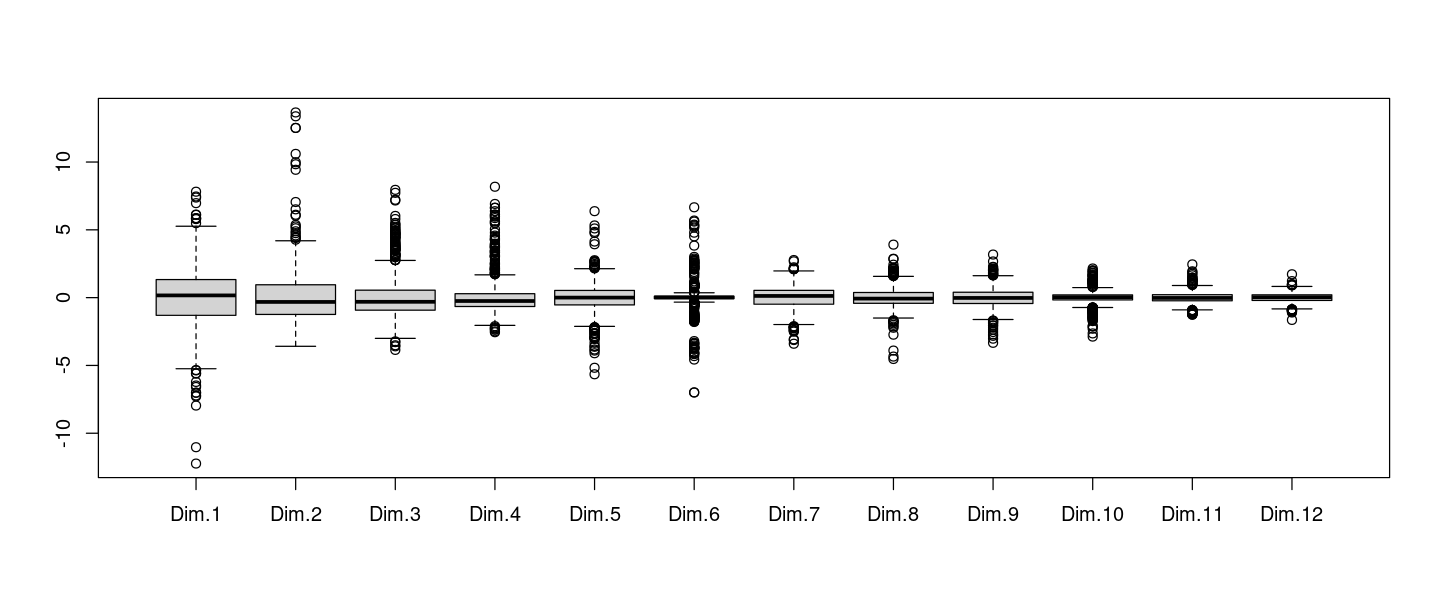

In [17]:
boxplot(acp$ind$coord)

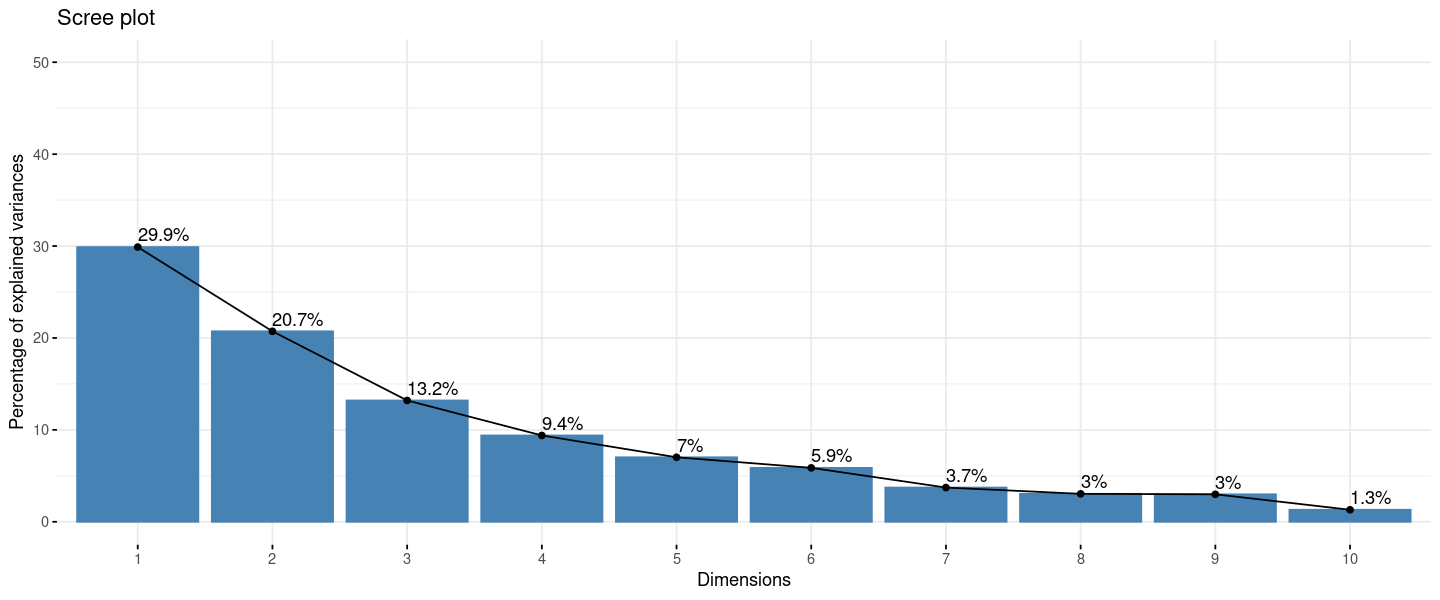

In [18]:
#Scree plot
library("factoextra")
fviz_eig(acp, addlabels=TRUE, ylim=c(0,50))

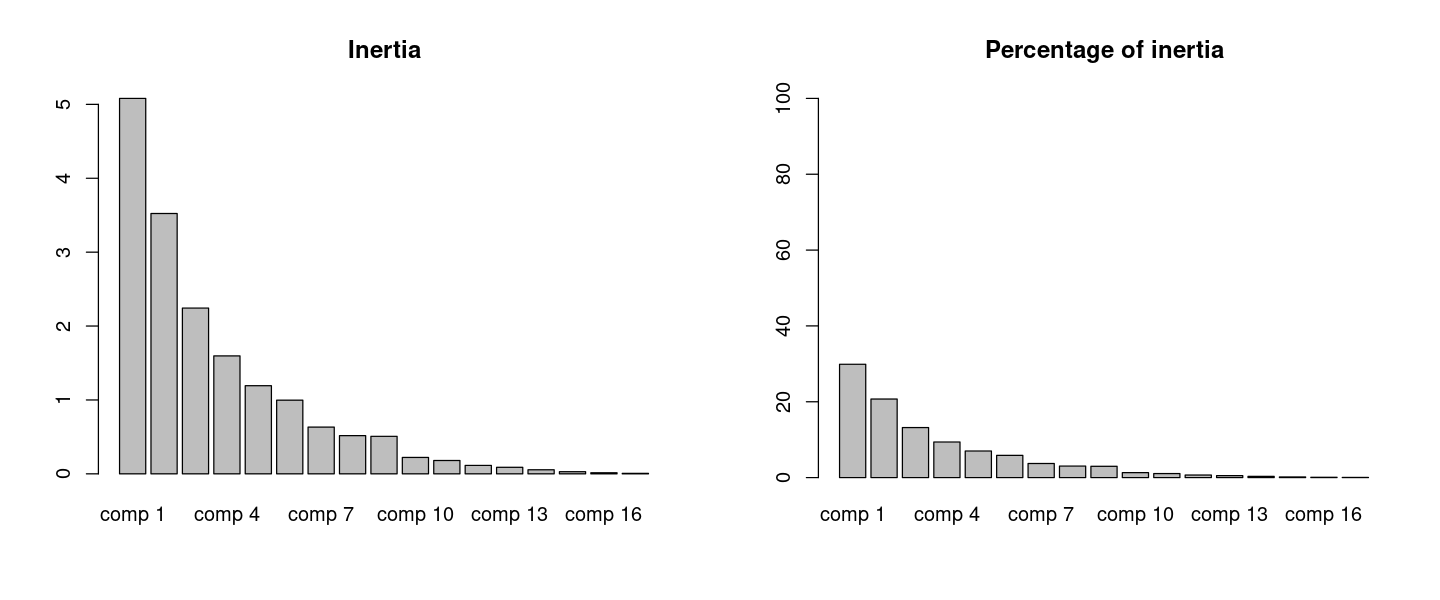

In [19]:
par(mfrow = c(1, 2))
barplot(acp$eig[, 1], main = "Inertia")
barplot(acp$eig[, 2], ylim = c(0, 100), main = "Percentage of inertia")

In [20]:
library("pander")
res <- prcomp(biodeg2, center = TRUE, scale = TRUE)
pander(factoextra::get_eig(res))



|   &nbsp;   | eigenvalue | variance.percent | cumulative.variance.percent |
|:----------:|:----------:|:----------------:|:---------------------------:|
| **Dim.1**  |   5.081    |      29.89       |            29.89            |
| **Dim.2**  |   3.523    |      20.72       |            50.61            |
| **Dim.3**  |   2.243    |       13.2       |            63.81            |
| **Dim.4**  |   1.596    |      9.389       |            73.2             |
| **Dim.5**  |   1.193    |      7.015       |            80.21            |
| **Dim.6**  |   0.997    |      5.865       |            86.08            |
| **Dim.7**  |   0.6327   |      3.722       |            89.8             |
| **Dim.8**  |   0.5168   |       3.04       |            92.84            |
| **Dim.9**  |   0.5077   |      2.986       |            95.82            |
| **Dim.10** |   0.2217   |      1.304       |            97.13            |
| **Dim.11** |   0.1805   |      1.062       |            98.19           

On voit que si on prend 4 composantes, on explique 77% de l'inertie totale. Si on prend 5 composantes, on représentera environ 80% de l'inertie totale. Autrement dit, 80% de la variabilité totale du nuage d'individus est représentée dans ce plan. 

In [12]:
#summary(princomp(biodeg2,cor=FALSE))

On vérifie que les variables principales sont orthogonales et que la norme au carré est égale à l'inertie. 

In [21]:
cov(acp$ind$coord)
n <- nrow(biodeg2)
# note that by default the covariance uses a normalization of n-1 instead of n
cbind(norm2 = diag(cov(acp$ind$coord)) * (n-1) / n, 
      inertia = acp$eig[, 1])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
Dim.1,5.085589e+00,-5.037574e-16,-1.694386e-16,2.865164e-16,-1.490134e-16,-1.112868e-16,1.717166e-16,-1.366561e-16,1.353398e-16,7.815195e-17,5.220466e-17,4.765081e-17
Dim.2,-5.037574e-16,3.526199e+00,7.668508e-17,-5.739475e-16,7.118037e-16,-5.148474e-17,-2.238717e-16,1.510758e-16,-1.433248e-16,-4.743616e-17,-5.935698e-18,-1.774967e-17
Dim.3,-1.694386e-16,7.668508e-17,2.245572e+00,1.581474e-15,9.025340e-16,2.537150e-16,1.397925e-16,1.707847e-16,-4.599456e-16,1.429134e-16,-5.520761e-18,3.862138e-17
Dim.4,2.865164e-16,-5.739475e-16,1.581474e-15,1.597718e+00,6.583420e-16,-1.478802e-16,-7.710958e-17,2.874304e-16,-2.163497e-16,-1.595445e-16,-2.089329e-16,-4.392177e-17
Dim.5,-1.490134e-16,7.118037e-16,9.025340e-16,6.583420e-16,1.193661e+00,-1.299152e-16,-2.368989e-16,-1.114863e-16,7.837312e-17,-5.670898e-17,2.004101e-17,1.036589e-17
Dim.6,-1.112868e-16,-5.148474e-17,2.537150e-16,-1.478802e-16,-1.299152e-16,9.979856e-01,2.883562e-16,-1.287955e-16,1.243960e-16,1.239745e-16,5.748723e-18,-4.166349e-17
Dim.7,1.717166e-16,-2.238717e-16,1.397925e-16,-7.710958e-17,-2.368989e-16,2.883562e-16,6.333462e-01,2.464145e-17,-3.840213e-16,-4.054118e-17,-1.572173e-17,1.131553e-16
Dim.8,-1.366561e-16,1.510758e-16,1.707847e-16,2.874304e-16,-1.114863e-16,-1.287955e-16,2.464145e-17,5.172562e-01,1.637411e-17,8.278935e-19,-3.958363e-17,2.386033e-17
Dim.9,1.353398e-16,-1.433248e-16,-4.599456e-16,-2.163497e-16,7.837312e-17,1.243960e-16,-3.840213e-16,1.637411e-17,5.081670e-01,-3.976864e-17,-9.159464e-17,5.694215e-18
Dim.10,7.815195e-17,-4.743616e-17,1.429134e-16,-1.595445e-16,-5.670898e-17,1.239745e-16,-4.054118e-17,8.278935e-19,-3.976864e-17,2.219412e-01,1.088413e-17,1.183340e-18


Warning message in cbind(norm2 = diag(cov(acp$ind$coord)) * (n - 1)/n, inertia = acp$eig[, :
“number of rows of result is not a multiple of vector length (arg 1)”


,norm2,inertia
comp 1,5.0807690,5.080768976
comp 2,3.5228563,3.522856304
comp 3,2.2434431,2.243443122
comp 4,1.5962040,1.596204010
comp 5,1.1925295,1.192529508
comp 6,0.9970397,0.997039684
comp 7,0.6327459,0.632745896
comp 8,0.5167659,0.516765908
comp 9,0.5076853,0.507685306
comp 10,0.2217308,0.221730824


### Composante 1 contre composante 2

#### Cercle corrélation

In [46]:
options(repr.plot.width = 6, repr.plot.height = 6)

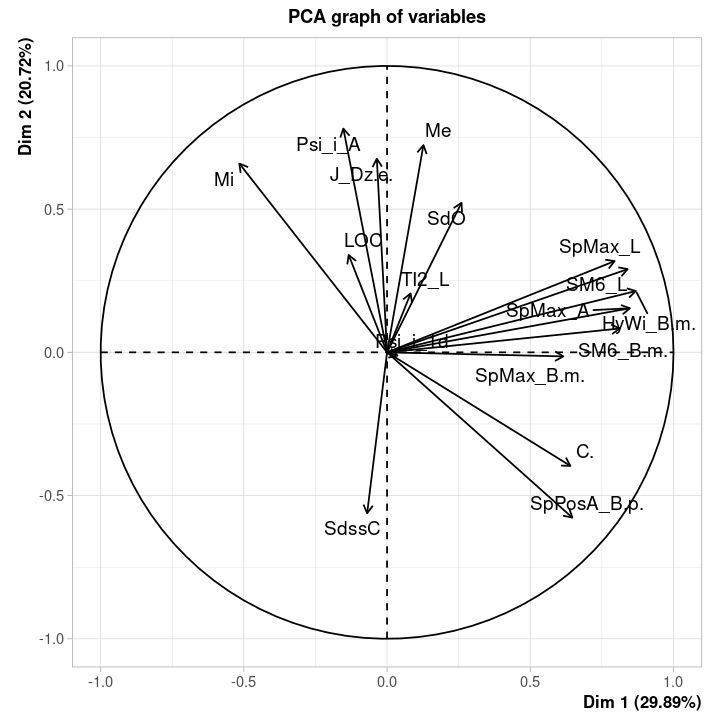

In [47]:
acp <- PCA(biodeg2, scale.unit = TRUE, ncp =12, graph = F)
plot(acp, axes = c(1, 2), choix = "var")

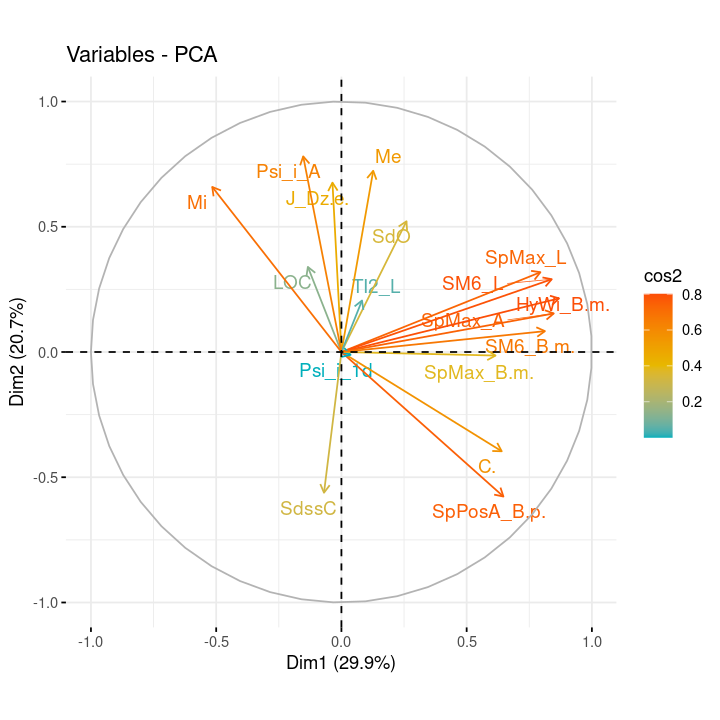

In [48]:
fviz_pca_var(acp, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

On a tendance à dire que les variables sont plutôt bien représentées dans ce plan là.
On aurait tendance à dire que l'axe 2 porte l'information sur la matrice de Laplace ( à comprendre, plus côté maths) et l'axe 1 porte les infos de chimie? 

#### Graphique des individus

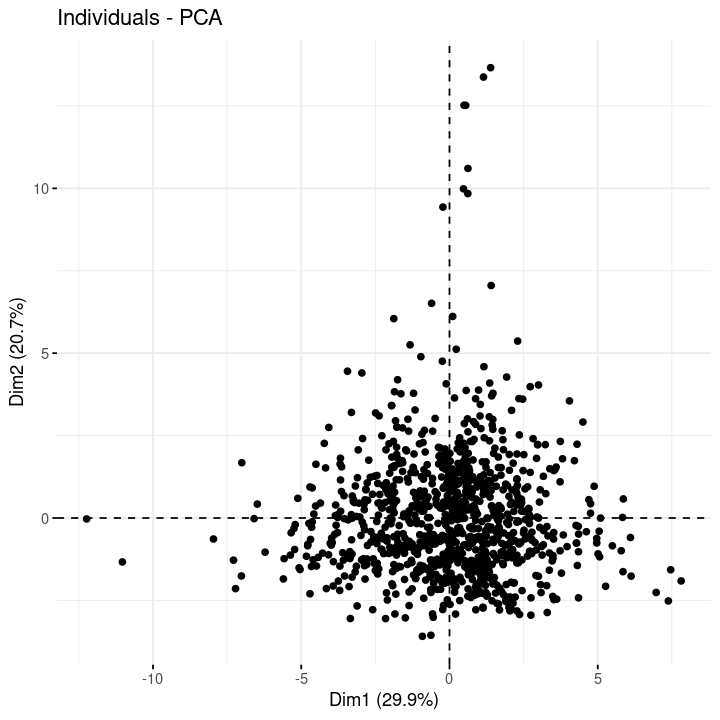

In [49]:
fviz_pca_ind(acp,coo.ind="contrib",label="none")

#### Contribution variables sur axes

On va essayer de voir s'il y a des variables qui ne contribuent pas à certaine dimension pour pouvoir les éliminer

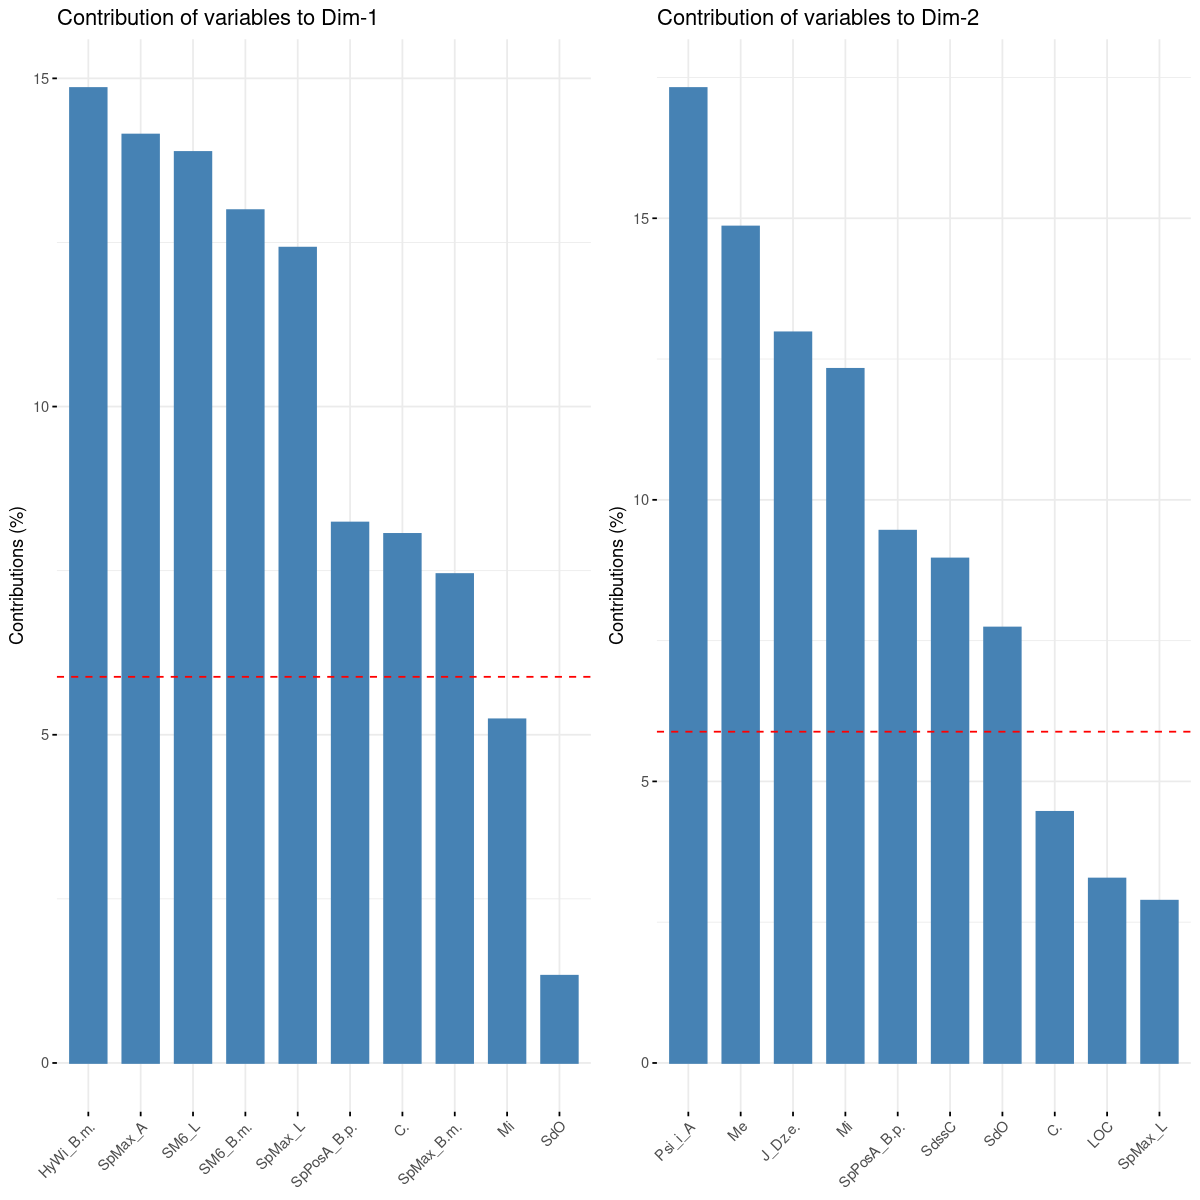

In [50]:
options(repr.plot.width = 10, repr.plot.height = 10)
library(ggplot2)
library(gridExtra)
g1 <- fviz_contrib(acp, choice = "var", axes = 1, top = 10)
g2 <- fviz_contrib(acp, choice = "var", axes = 2, top = 10)
grid.arrange(g1,g2,ncol=2)

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


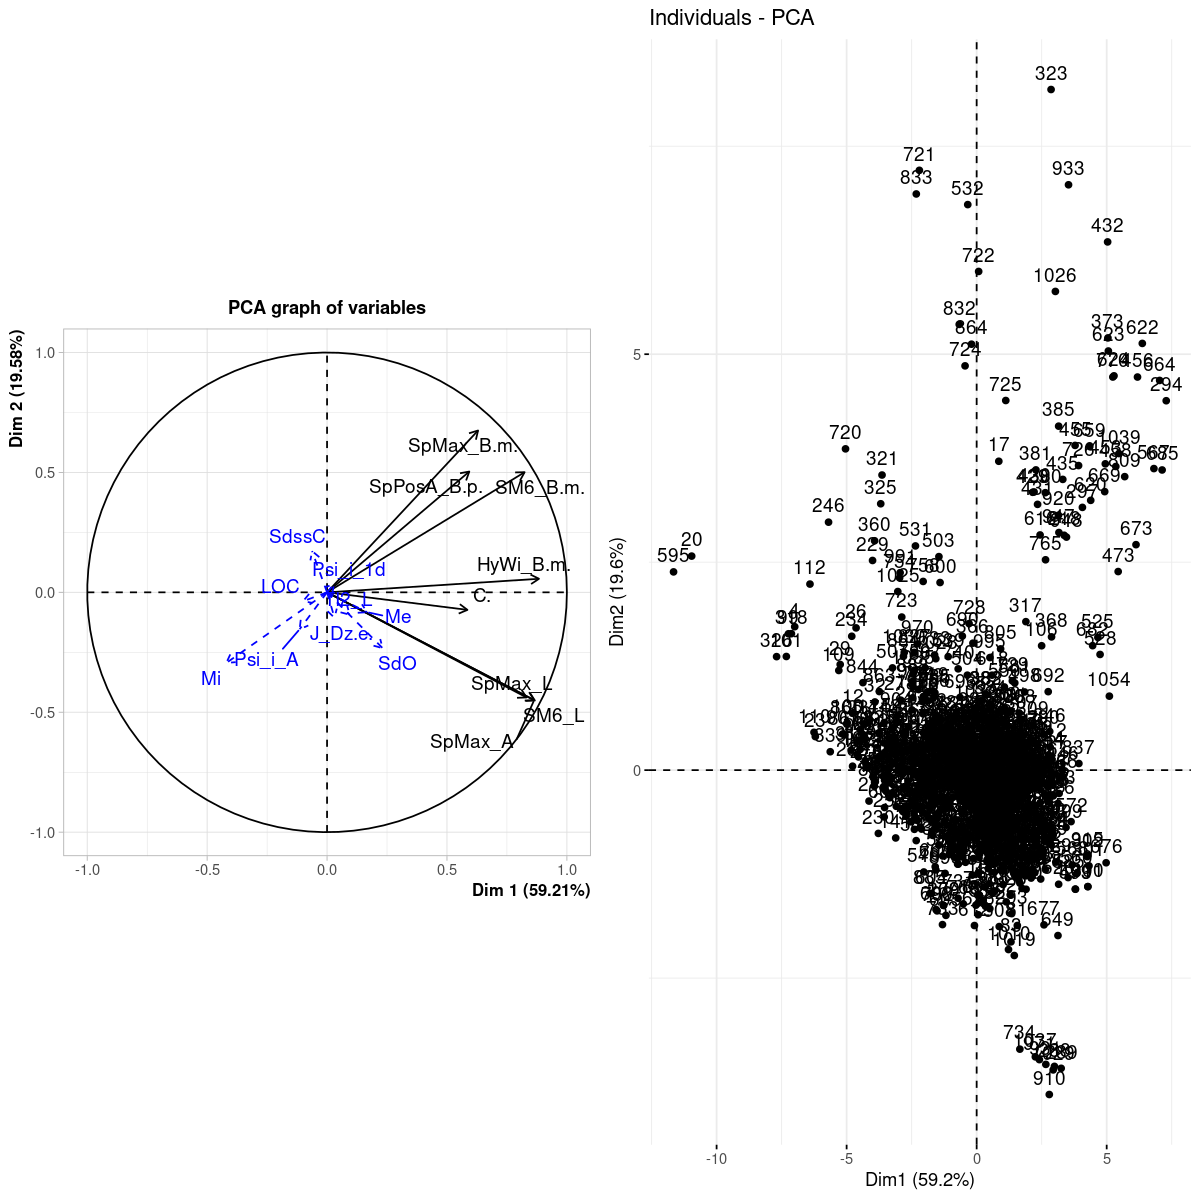

In [43]:
#On voit que pour la dimension 1, seules 8 variables qualitatives contribuent, on va donc les retenir
acp1 <- PCA(biodeg2, scale.unit = TRUE, ncp =12, graph = F,quanti.sup=c(2,4,6,8,9,12,13,14,16))
a <- plot(acp1, axes = c(1, 2), choix = "var")
b <- fviz_pca_ind(acp1,coo.ind="contrib")
grid.arrange(a,b,ncol=2)

On pourrait faire pareil pour dimension 2 (jsp si c'est utile)

In [79]:
#à faire pour axe 2

### Composante 1 contre composante 3

#### Cercle corrélation

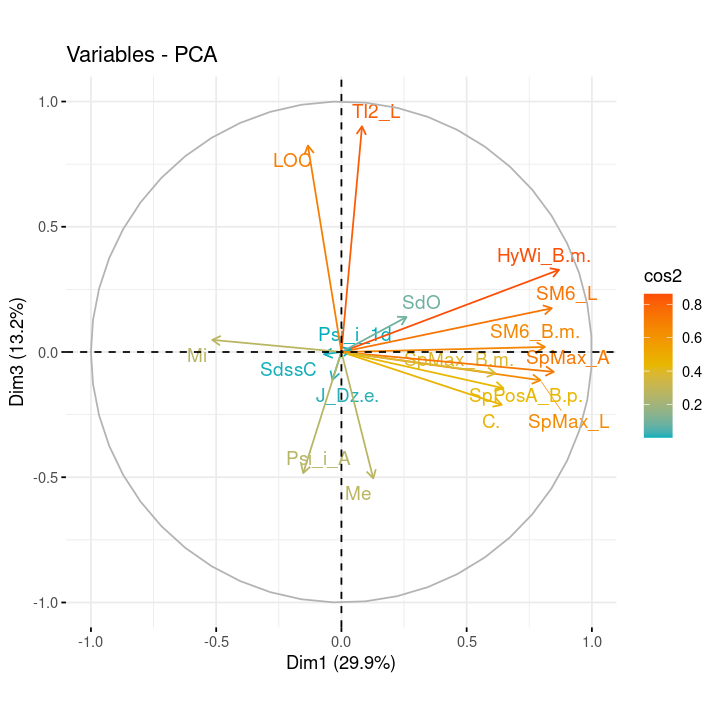

In [51]:
options(repr.plot.width = 6, repr.plot.height = 6)

acp <- PCA(biodeg2, scale.unit = TRUE, ncp =12, graph = F)
fviz_pca_var(acp, axes=c(1,3), col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

#### Graphique des individus

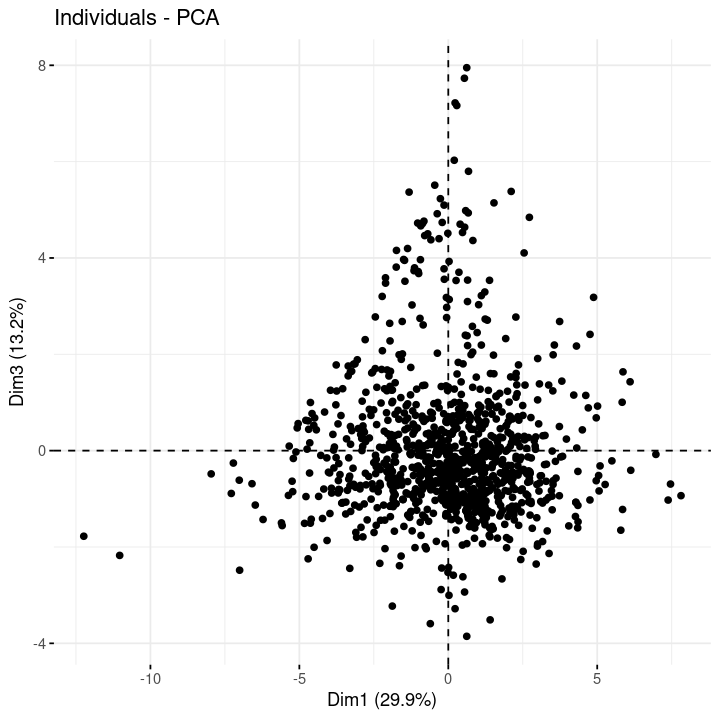

In [80]:
fviz_pca_ind(acp,axe=c(1,3),coo.ind="contrib",label="none")

#### Contribution des variables sur l'axe 3

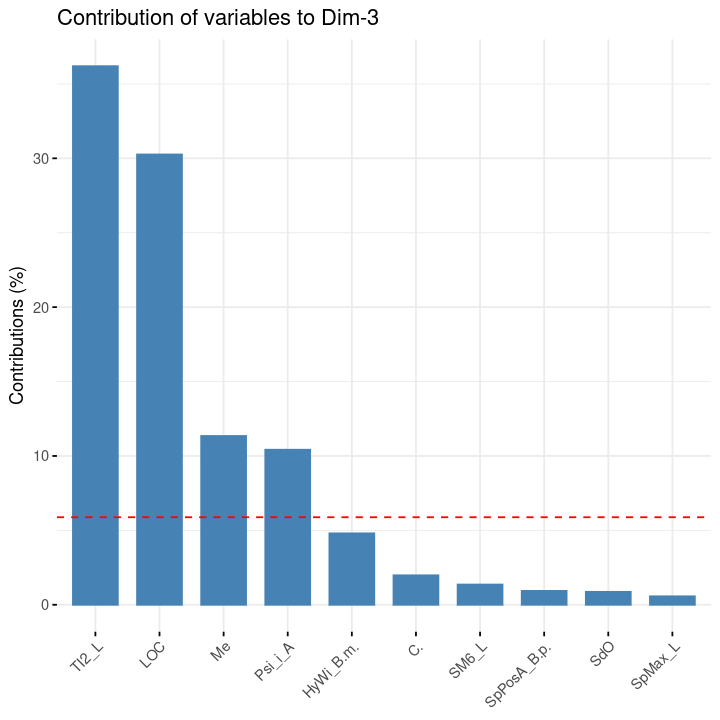

In [74]:
fviz_contrib(acp, choice = "var", axes = 3, top = 10)

On voit que seules 4 variables contribuent sur l'axe 3, on va donc placer les autres en supplémentaires.

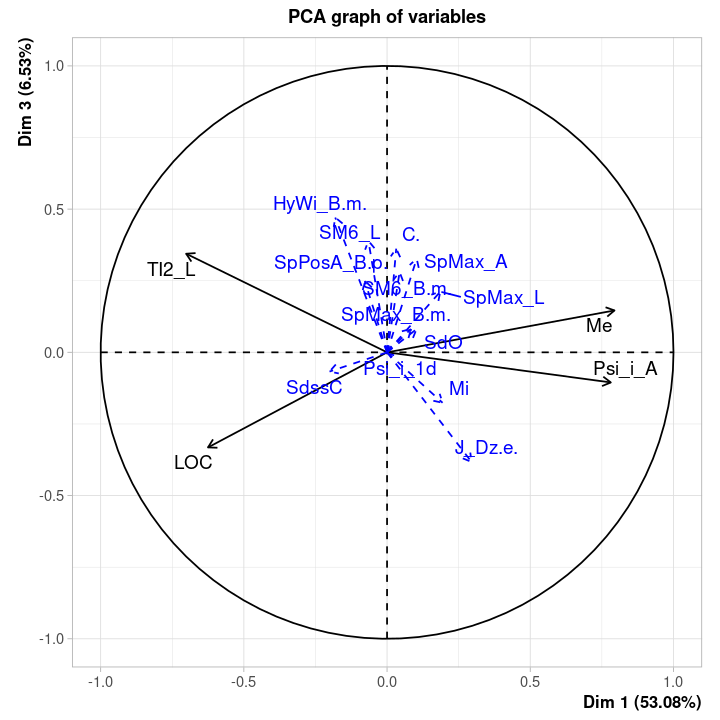

In [77]:
acp1 <- PCA(biodeg2, scale.unit = TRUE, ncp =12, graph = F,quanti.sup=c(1,2,3,4,5,7,9,10,11,12,13,15,17))
plot(acp1, axes = c(1, 3), choix = "var")

### Composante 2 contre composante 3

#### Cercle de corrélation

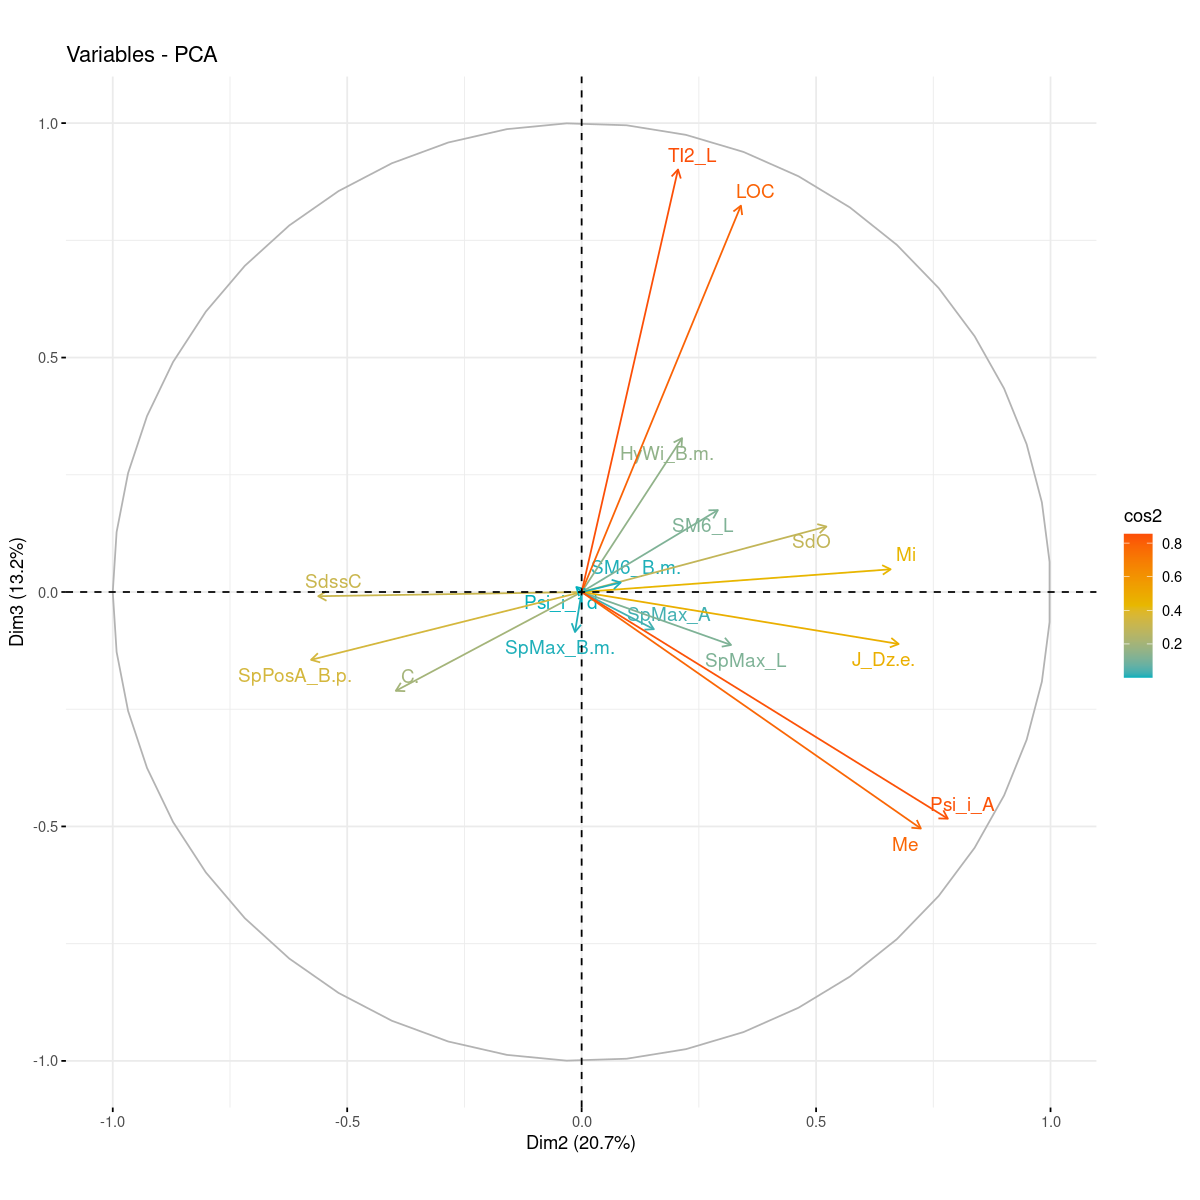

In [69]:
options(repr.plot.width = 10, repr.plot.height = 10)
acp <- PCA(biodeg2, scale.unit = TRUE, ncp =12, graph = F)
fviz_pca_var(acp, axes=c(2,3), col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )


pas top non plus

#### Graphique des individus

### Composante 4 inutile

#### Cercle de corrélation

Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


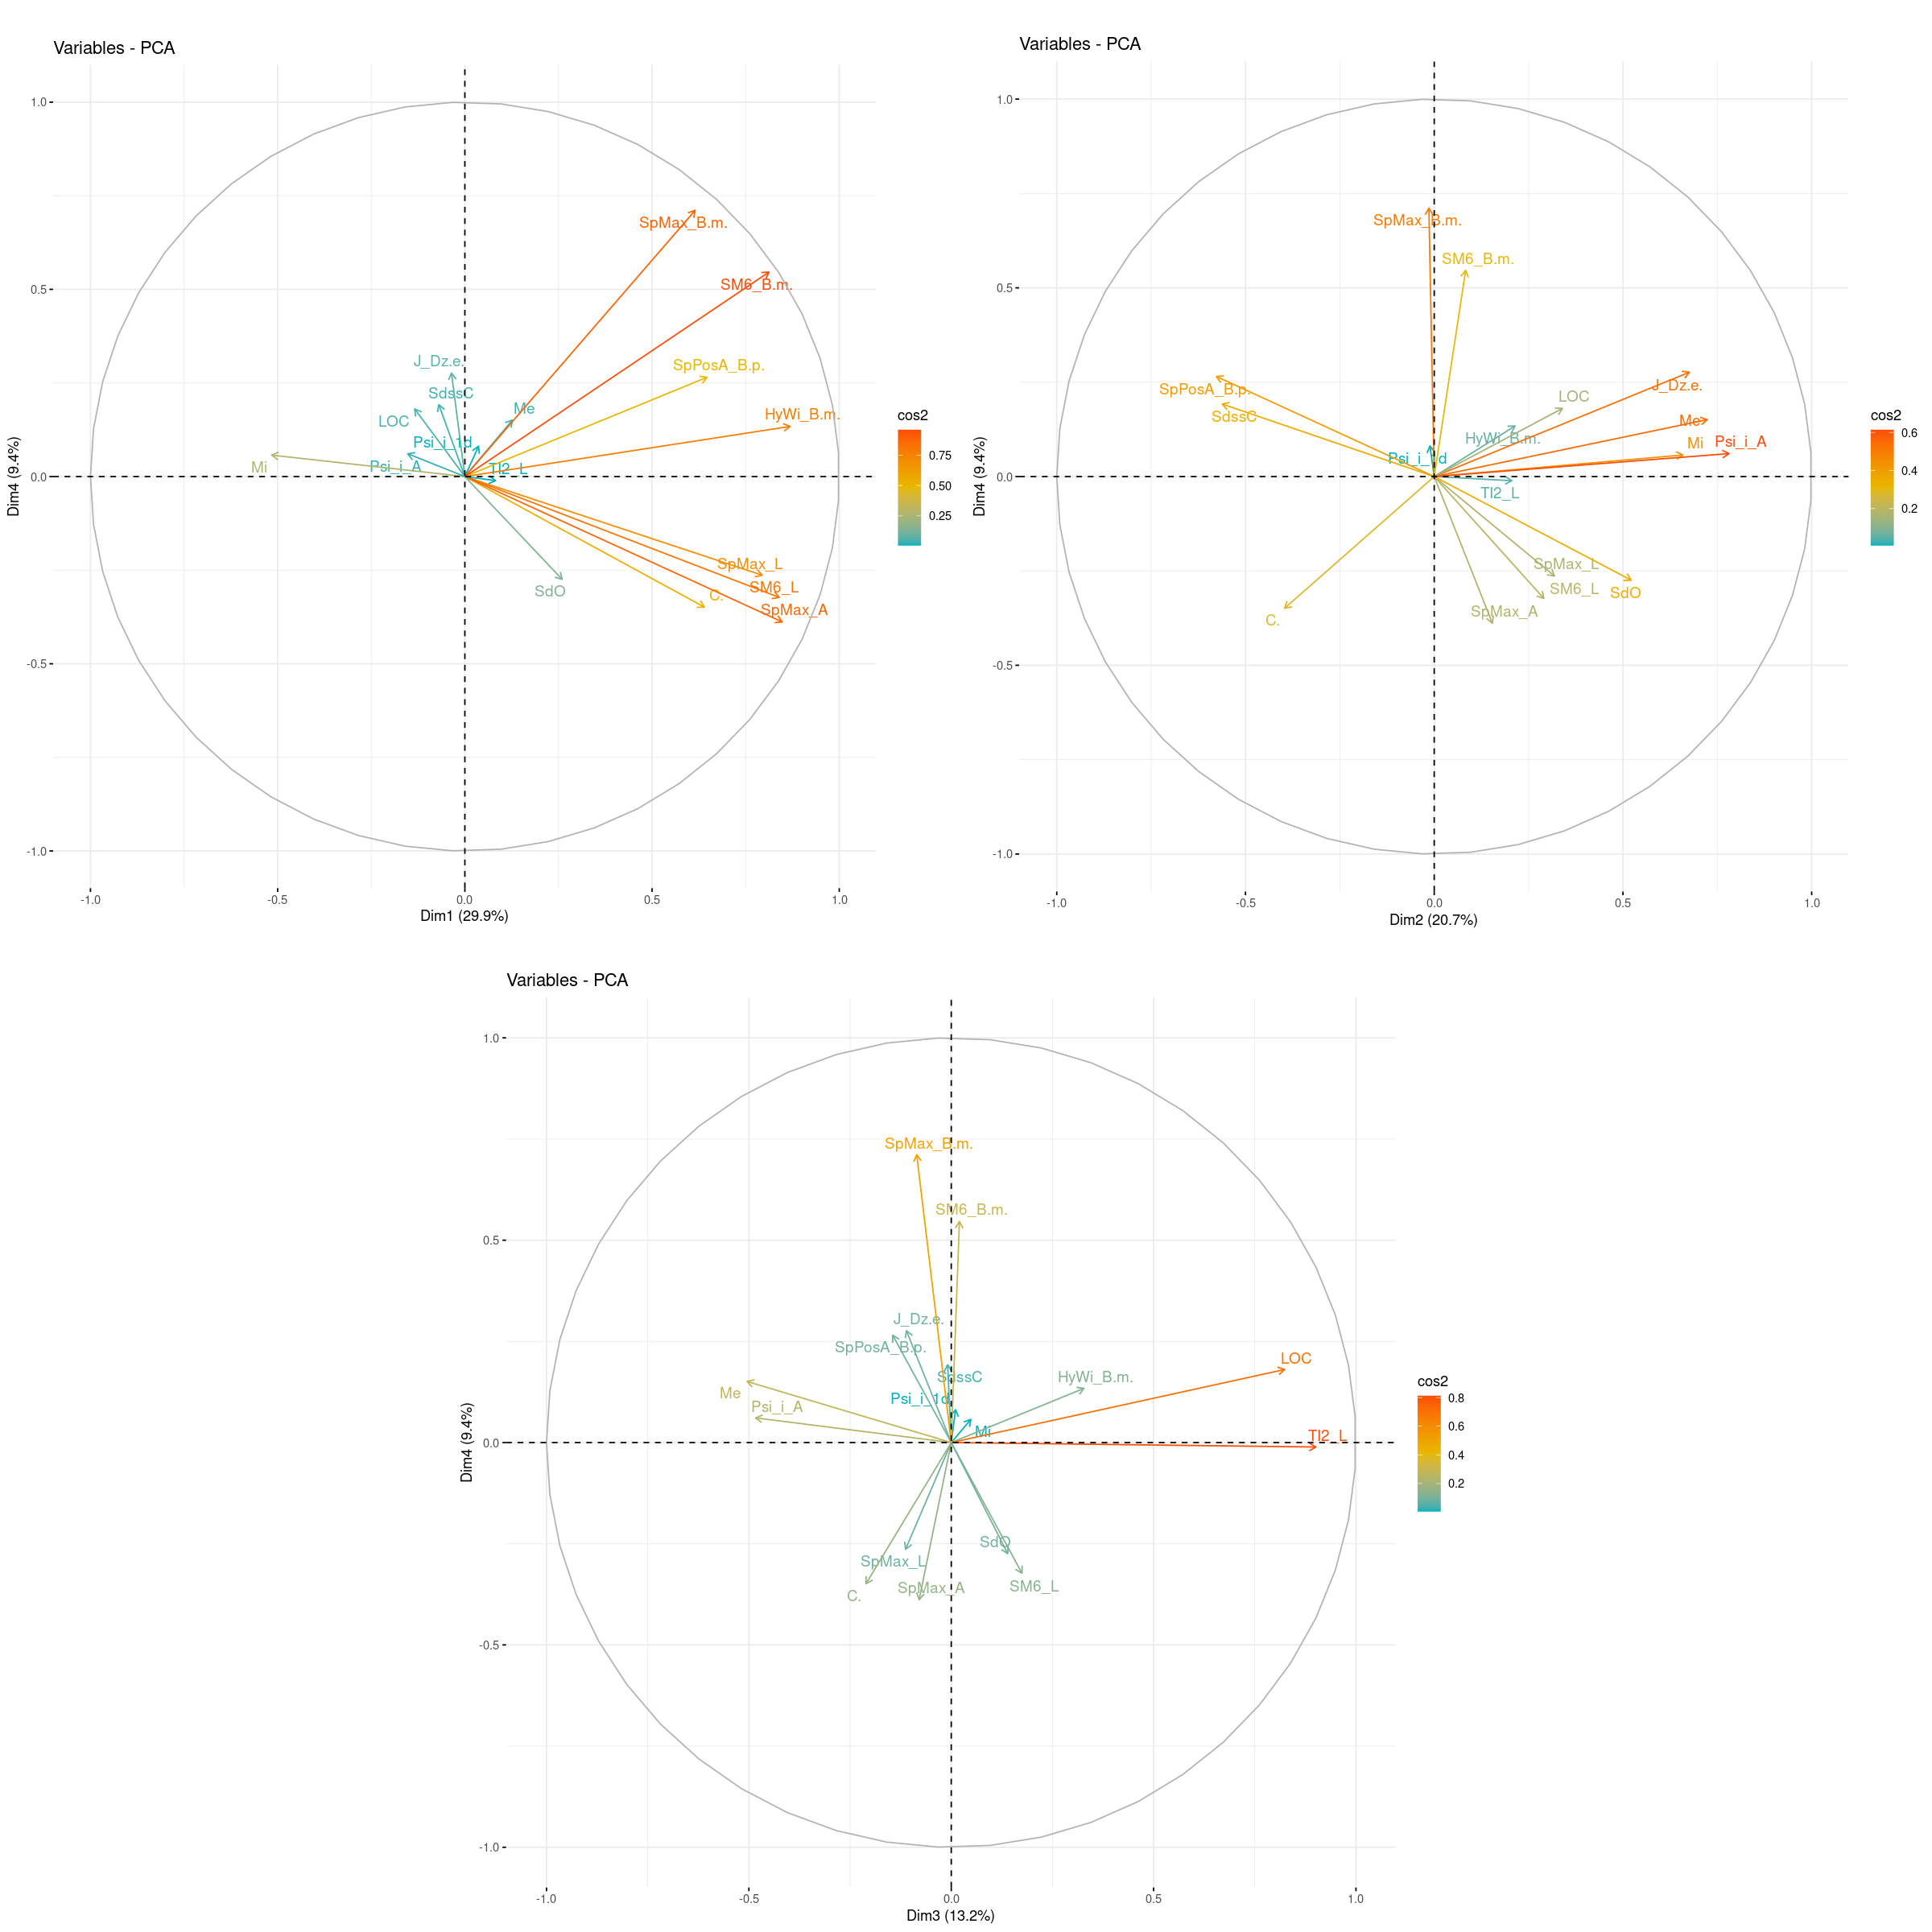

In [66]:
options(repr.plot.width = 20, repr.plot.height = 20)
acp <- PCA(biodeg2, scale.unit = TRUE, ncp =12, graph = F)
a <- fviz_pca_var(acp, axes=c(1,4), col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

b <- fviz_pca_var(acp, axes=c(2,4), col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )
c <- fviz_pca_var(acp, axes=c(3,4), col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

grid.arrange(arrangeGrob(a,b,ncol=2),c)


On voit que la dimension 4 ne représente pas hyper bien le jeu de données donc on ne va pas la retenir. 
On va donc faire notre étude avec les dimensions 1 et 2 ou 2 et 3

Graphique des individus

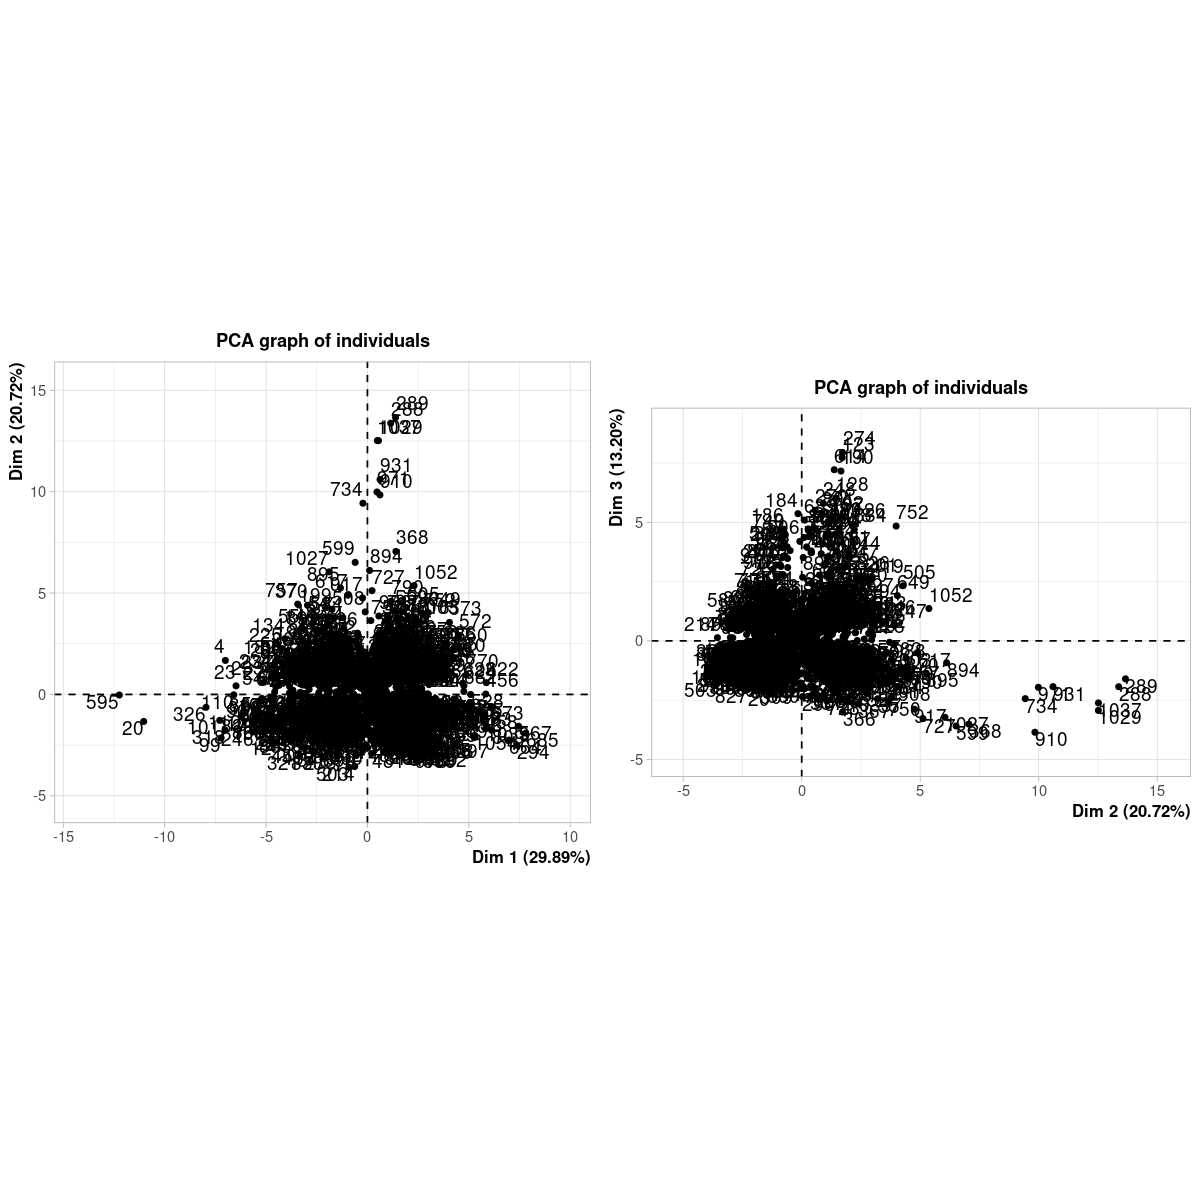

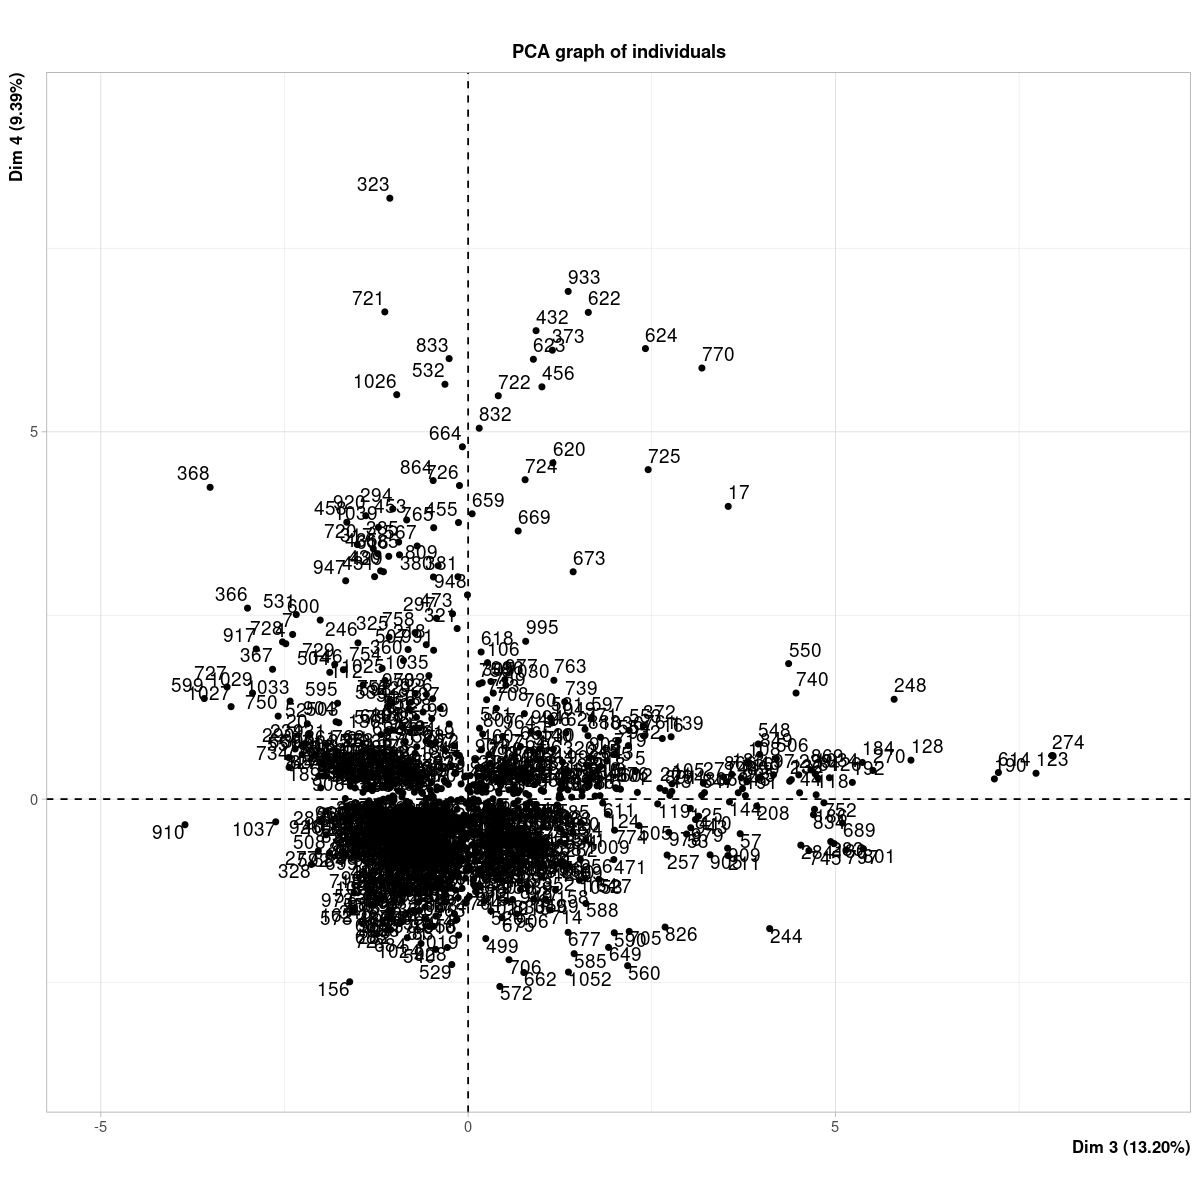

In [26]:
options(repr.plot.width = 10, repr.plot.height = 10)
library(gridExtra)
#par(mfrow=c(1,3))
g1 <- plot(acp,axes = c(1, 2))
g2 <- plot(acp,axes = c(2, 3))

grid.arrange(g1,g2,ncol=2)
plot(acp,axes = c(3, 4))


Warning message in par(new = TRUE):
“appel de par(new=TRUE) sans graphe”


[1] 5 6

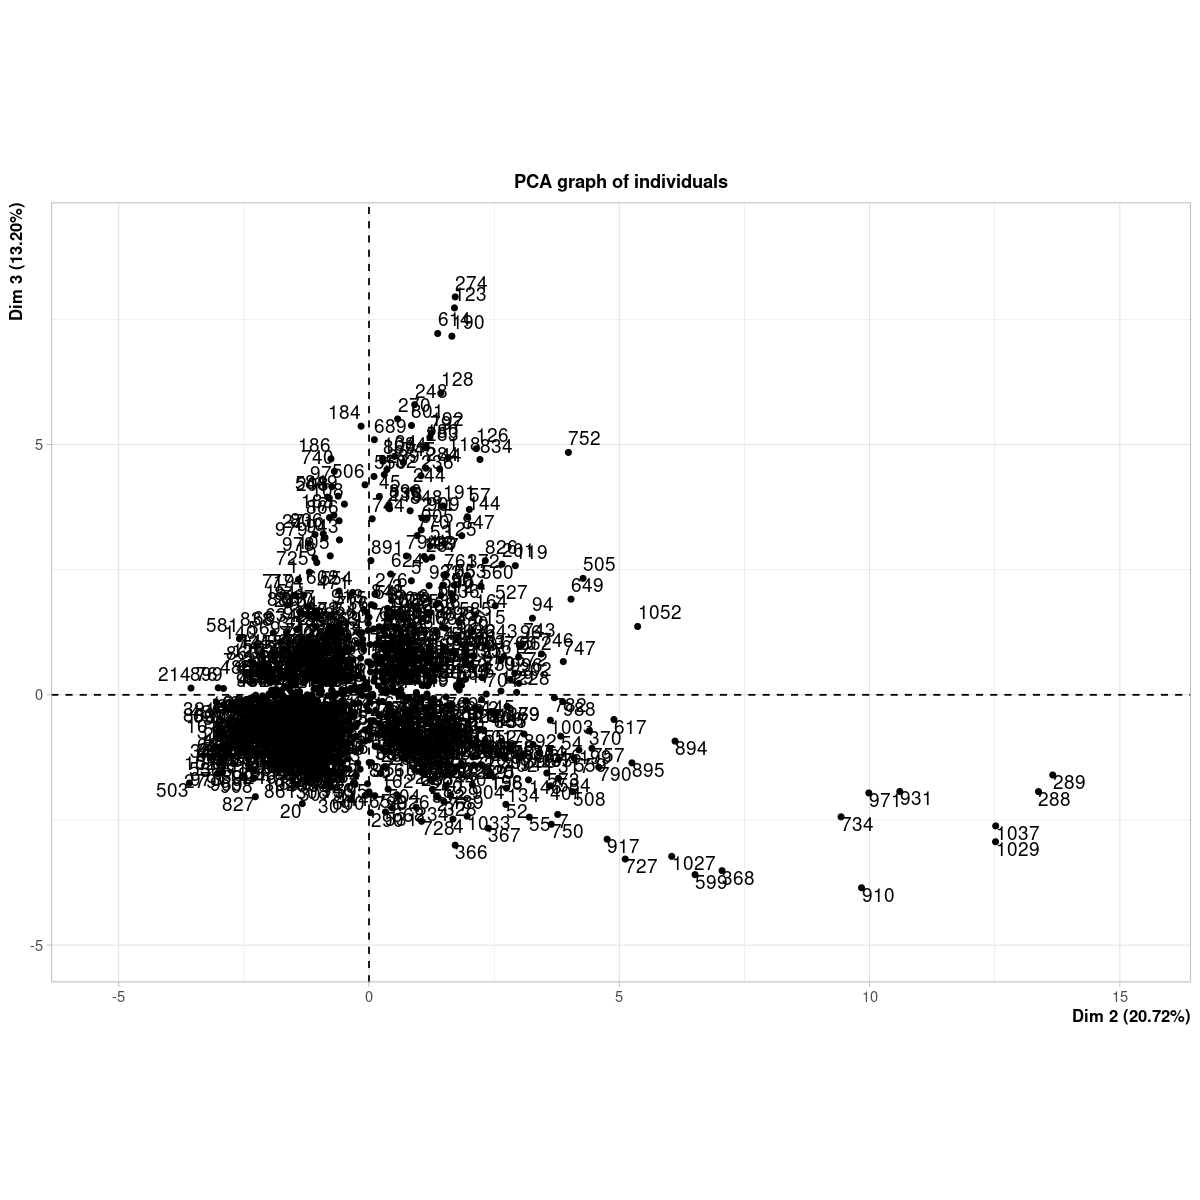

In [64]:
split.screen(1:2)
screen(1);plot(acp,axes = c(1, 2))
screen(2);plot(acp,axes = c(2, 3))

In [53]:
library("corrplot")
corrplot(var$contrib, is.corr=FALSE)    

ERROR: Error in var$contrib: objet de type 'closure' non indiçable


In [54]:
head(var$contrib, 4)

ERROR: Error in var$contrib: objet de type 'closure' non indiçable


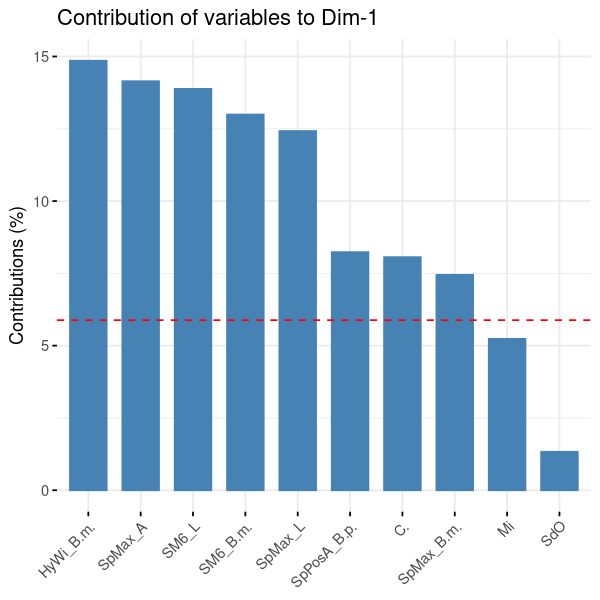

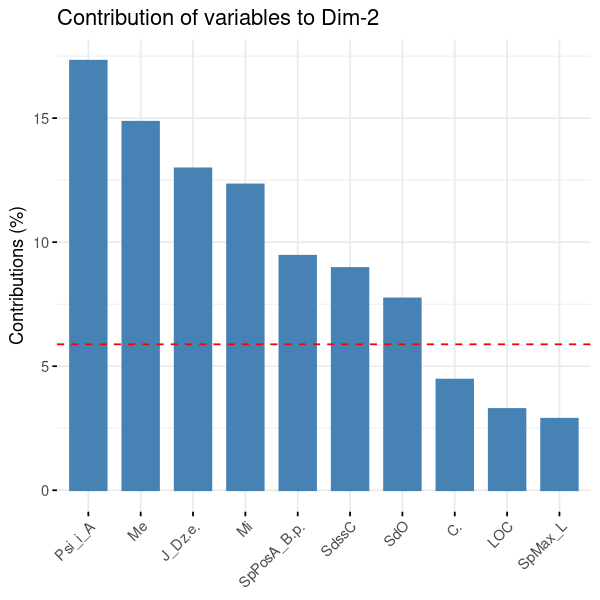

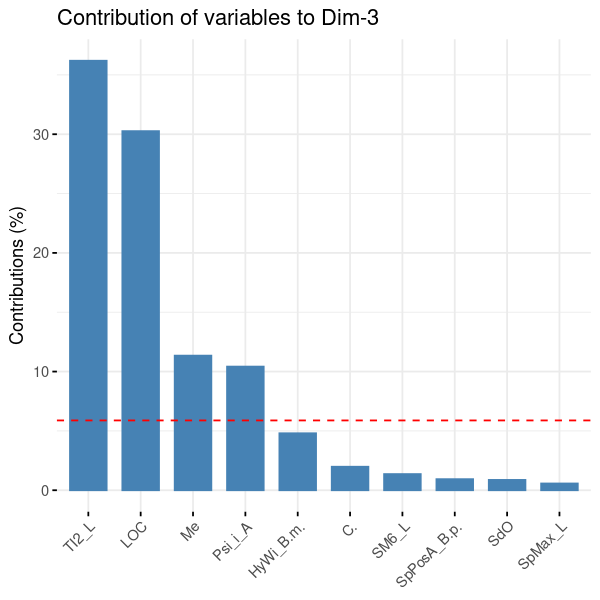

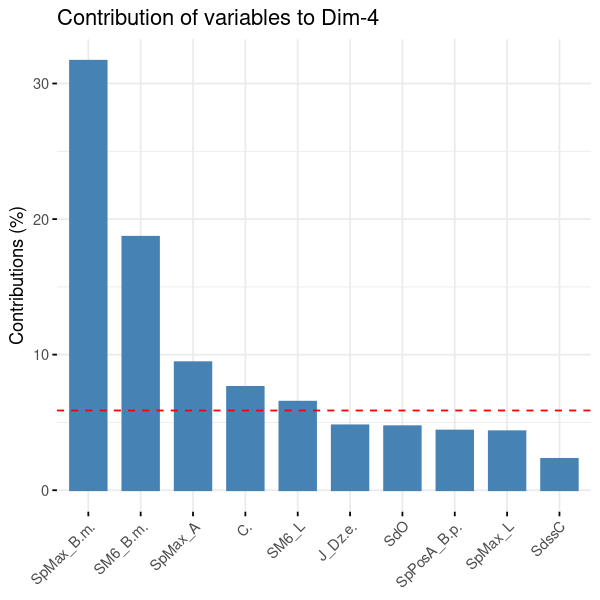

In [59]:
# Contributions des variables à PC1
par(mfrow=c(2,2))
fviz_contrib(acp, choice = "var", axes = 1, top = 10)
# Contributions des variables à PC2
fviz_contrib(acp, choice = "var", axes = 2, top = 10)
fviz_contrib(acp, choice = "var", axes = 3, top = 10)
fviz_contrib(acp, choice = "var", axes = 4, top = 10)

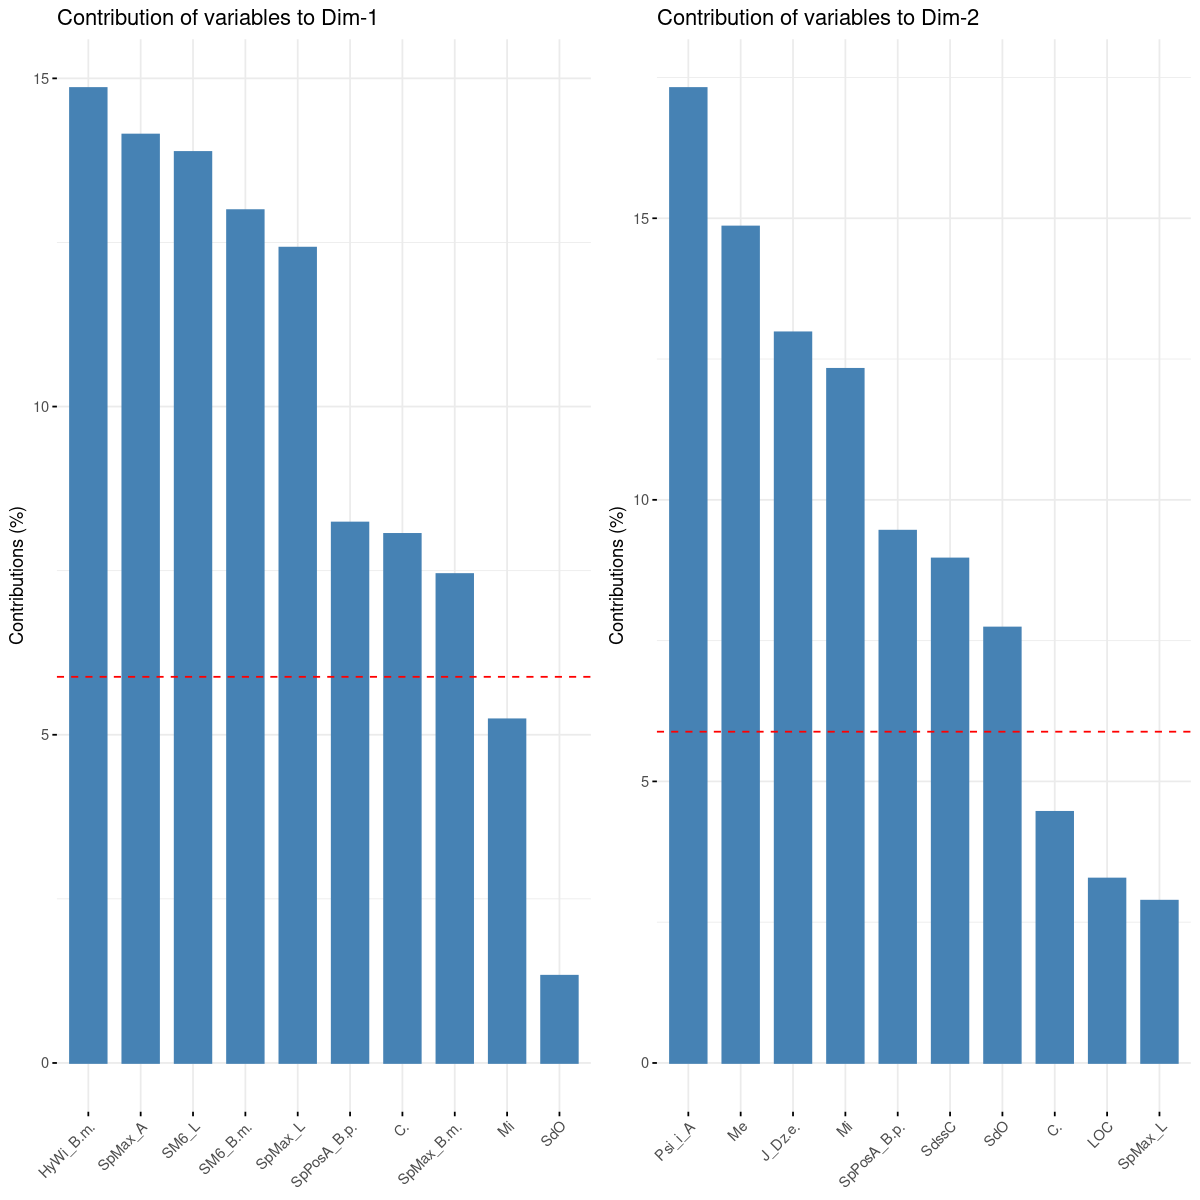

In [65]:
library(ggplot2)
library(gridExtra)
g1 <- fviz_contrib(acp, choice = "var", axes = 1, top = 10)
g2 <- fviz_contrib(acp, choice = "var", axes = 2, top = 10)
grid.arrange(g1,g2,ncol=2)

In [30]:
#On voit que pour la dimension 1, seules 8 variables qualitatives contribuent, on va donc les retenir
acp1 <- PCA(biodeg2, scale.unit = TRUE, ncp =12, graph = F,quanti.sup=c(2,4,6,8,9,12,13,14,16,18   ))
plot(acp1, axes = c(1, 2), choix = "var")
plot(acp1)

ERROR: Error in `[.data.frame`(Xtot, , quanti.sup, drop = FALSE): colonnes non définies sélectionnées
